In [2]:
import pandas as pd
import numpy as np
import csv

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
df_high = pd.read_excel("/content/drive/MyDrive/Conservatives-Official/Sameera-Data-collection/HighEstimate_AgPestUsebyCropGroup92to19.xls")
df_high.head()

,State_FIPS_code,State,Compound,Year,Units,Corn,Soybeans,Wheat,Cotton,Vegetables_and_fruit,Rice,Orchards_and_grapes,Alfalfa,Pasture_and_hay,Other_crops
0,1,Alabama,"2,4-D",1992,kg,4431.2,2798.6,12526.4,653.6,39.2,NaN,436.6,NaN,72508.4,16934.5
1,1,Alabama,"2,4-D",1993,kg,5575.1,2730.6,21602.9,NaN,NaN,NaN,336.1,NaN,59255.8,25909.1
2,1,Alabama,"2,4-D",1994,kg,4256.0,1770.7,3124.2,NaN,22.2,NaN,19.5,NaN,54588.6,20248.9
3,1,Alabama,"2,4-D",1995,kg,1623.0,5255.7,8303.9,NaN,147.4,NaN,1452.7,NaN,63459.9,13278.1
4,1,Alabama,"2,4-D",1996,kg,3240.8,30602.3,8103.8,38621.8,100.8,NaN,777.6,NaN,121023.6,11677.1


In [5]:
df_high = df_high.drop(['Corn', 'Soybeans', 'Cotton', 'Vegetables_and_fruit', 'Rice', 'Orchards_and_grapes', 'Alfalfa', 'Pasture_and_hay', 'Other_crops'], axis=1)
df_high.head()

,State_FIPS_code,State,Compound,Year,Units,Wheat
0,1,Alabama,"2,4-D",1992,kg,12526.4
1,1,Alabama,"2,4-D",1993,kg,21602.9
2,1,Alabama,"2,4-D",1994,kg,3124.2
3,1,Alabama,"2,4-D",1995,kg,8303.9
4,1,Alabama,"2,4-D",1996,kg,8103.8


In [6]:
df_high.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 65535 entries, 0 to 65534
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   State_FIPS_code  65535 non-null  int64  
 1   State            65535 non-null  object 
 2   Compound         65535 non-null  object 
 3   Year             65535 non-null  int64  
 4   Units            65535 non-null  object 
 5   Wheat            9318 non-null   float64
dtypes: float64(1), int64(2), object(3)
memory usage: 3.0+ MB


In [7]:
# filter for Alabama
alabama_df = df_high[df_high["State"] == "Alabama"]

print(alabama_df)

      State_FIPS_code    State  Compound  Year Units    Wheat
0                   1  Alabama     2,4-D  1992    kg  12526.4
1                   1  Alabama     2,4-D  1993    kg  21602.9
2                   1  Alabama     2,4-D  1994    kg   3124.2
3                   1  Alabama     2,4-D  1995    kg   8303.9
4                   1  Alabama     2,4-D  1996    kg   8103.8
...               ...      ...       ...   ...   ...      ...
4902                1  Alabama     ZIRAM  2015    kg      NaN
4903                1  Alabama     ZIRAM  2016    kg      NaN
4904                1  Alabama     ZIRAM  2017    kg      NaN
4905                1  Alabama     ZIRAM  2018    kg      NaN
4906                1  Alabama  ZOXAMIDE  2010    kg      NaN

[4907 rows x 6 columns]


In [8]:
alabama_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4907 entries, 0 to 4906
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   State_FIPS_code  4907 non-null   int64  
 1   State            4907 non-null   object 
 2   Compound         4907 non-null   object 
 3   Year             4907 non-null   int64  
 4   Units            4907 non-null   object 
 5   Wheat            582 non-null    float64
dtypes: float64(1), int64(2), object(3)
memory usage: 268.4+ KB


In [9]:
df_Epest = pd.read_excel("/content/drive/MyDrive/Conservatives-Official/Sameera-Data-collection/EPest_county_estimates_2013_2017_v2.xls")
df_Epest.head()

,COMPOUND,YEAR,STATE_FIPS_CODE,COUNTY_FIPS_CODE,EPEST_LOW_KG,EPEST_HIGH_KG
0,1-METHYL CYCLOPROPENE,2013,41,1,NaN,0.0
1,1-METHYL CYCLOPROPENE,2013,41,21,NaN,0.0
2,1-METHYL CYCLOPROPENE,2013,41,27,NaN,0.2
3,1-METHYL CYCLOPROPENE,2013,41,49,NaN,0.0
4,1-METHYL CYCLOPROPENE,2013,41,55,NaN,0.0


In [10]:
df_Epest['EPEST_LOW_KG'].isna().sum()

16841

In [11]:
df_Epest['EPEST_LOW_KG'].fillna(0, inplace=True)

In [12]:
df_Epest.head()

,COMPOUND,YEAR,STATE_FIPS_CODE,COUNTY_FIPS_CODE,EPEST_LOW_KG,EPEST_HIGH_KG
0,1-METHYL CYCLOPROPENE,2013,41,1,0.0,0.0
1,1-METHYL CYCLOPROPENE,2013,41,21,0.0,0.0
2,1-METHYL CYCLOPROPENE,2013,41,27,0.0,0.2
3,1-METHYL CYCLOPROPENE,2013,41,49,0.0,0.0
4,1-METHYL CYCLOPROPENE,2013,41,55,0.0,0.0


In [13]:

df_Epest['EPEST_DIFF_KG'] = df_Epest['EPEST_HIGH_KG'] - df_Epest['EPEST_LOW_KG']

print(df_Epest[['EPEST_LOW_KG', 'EPEST_HIGH_KG', 'EPEST_DIFF_KG']].head())
df_Epest.head()

   EPEST_LOW_KG  EPEST_HIGH_KG  EPEST_DIFF_KG
0           0.0            0.0            0.0
1           0.0            0.0            0.0
2           0.0            0.2            0.2
3           0.0            0.0            0.0
4           0.0            0.0            0.0


,COMPOUND,YEAR,STATE_FIPS_CODE,COUNTY_FIPS_CODE,EPEST_LOW_KG,EPEST_HIGH_KG,EPEST_DIFF_KG
0,1-METHYL CYCLOPROPENE,2013,41,1,0.0,0.0,0.0
1,1-METHYL CYCLOPROPENE,2013,41,21,0.0,0.0,0.0
2,1-METHYL CYCLOPROPENE,2013,41,27,0.0,0.2,0.2
3,1-METHYL CYCLOPROPENE,2013,41,49,0.0,0.0,0.0
4,1-METHYL CYCLOPROPENE,2013,41,55,0.0,0.0,0.0


In [14]:
df_Epest = df_Epest.drop(['EPEST_LOW_KG','EPEST_HIGH_KG'], axis = 1)
df_Epest.head()

,COMPOUND,YEAR,STATE_FIPS_CODE,COUNTY_FIPS_CODE,EPEST_DIFF_KG
0,1-METHYL CYCLOPROPENE,2013,41,1,0.0
1,1-METHYL CYCLOPROPENE,2013,41,21,0.0
2,1-METHYL CYCLOPROPENE,2013,41,27,0.2
3,1-METHYL CYCLOPROPENE,2013,41,49,0.0
4,1-METHYL CYCLOPROPENE,2013,41,55,0.0


In [15]:
df_Epest.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 65535 entries, 0 to 65534
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   COMPOUND          65535 non-null  object 
 1   YEAR              65535 non-null  int64  
 2   STATE_FIPS_CODE   65535 non-null  int64  
 3   COUNTY_FIPS_CODE  65535 non-null  int64  
 4   EPEST_DIFF_KG     65535 non-null  float64
dtypes: float64(1), int64(3), object(1)
memory usage: 2.5+ MB


In [16]:
df_Epest.rename(columns={'STATE_FIPS_CODE': 'State_FIPS_code'}, inplace=True)

In [17]:
#merge df_high and df_Epest dataframes with State_FIPS_code
merged_df_high_est = pd.merge(alabama_df, df_Epest, on= "State_FIPS_code", how='inner')
merged_df_high_est.head()

,State_FIPS_code,State,Compound,Year,Units,Wheat,COMPOUND,YEAR,COUNTY_FIPS_CODE,EPEST_DIFF_KG
0,1,Alabama,"2,4-D",1992,kg,12526.4,"2,4-D",2013,1,661.9
1,1,Alabama,"2,4-D",1992,kg,12526.4,"2,4-D",2013,3,3068.8
2,1,Alabama,"2,4-D",1992,kg,12526.4,"2,4-D",2013,5,245.3
3,1,Alabama,"2,4-D",1992,kg,12526.4,"2,4-D",2013,7,2.7
4,1,Alabama,"2,4-D",1992,kg,12526.4,"2,4-D",2013,9,46.3


In [18]:
merged_df_high_est.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7571501 entries, 0 to 7571500
Data columns (total 10 columns):
 #   Column            Dtype  
---  ------            -----  
 0   State_FIPS_code   int64  
 1   State             object 
 2   Compound          object 
 3   Year              int64  
 4   Units             object 
 5   Wheat             float64
 6   COMPOUND          object 
 7   YEAR              int64  
 8   COUNTY_FIPS_CODE  int64  
 9   EPEST_DIFF_KG     float64
dtypes: float64(2), int64(4), object(4)
memory usage: 635.4+ MB


In [19]:
merged_df_high_est["Year"].unique()

array([1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002,
       2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013,
       2014, 2015, 2016, 2017, 2018, 2019])

In [20]:
merged_df_high_est["YEAR"].unique()

array([2013, 2014, 2015, 2016, 2017])

In [21]:
merged_df_high_est = merged_df_high_est[(merged_df_high_est['Year'] >= 2013) & (merged_df_high_est['Year'] <= 2017)]
merged_df_high_est.head()

,State_FIPS_code,State,Compound,Year,Units,Wheat,COMPOUND,YEAR,COUNTY_FIPS_CODE,EPEST_DIFF_KG
32403,1,Alabama,"2,4-D",2013,kg,2859.8,"2,4-D",2013,1,661.9
32404,1,Alabama,"2,4-D",2013,kg,2859.8,"2,4-D",2013,3,3068.8
32405,1,Alabama,"2,4-D",2013,kg,2859.8,"2,4-D",2013,5,245.3
32406,1,Alabama,"2,4-D",2013,kg,2859.8,"2,4-D",2013,7,2.7
32407,1,Alabama,"2,4-D",2013,kg,2859.8,"2,4-D",2013,9,46.3


In [22]:
merged_df_high_est["State"].unique()

array(['Alabama'], dtype=object)

In [23]:
merged_df_high_est= merged_df_high_est.drop(["YEAR"], axis = 1)

In [24]:
state_fips = pd.read_csv("/content/drive/MyDrive/Conservatives-Official/Sameera-Data-collection/state_FIPS.csv")

In [25]:
county_fips = pd.read_excel("/content/drive/MyDrive/Conservatives-Official/Sameera-Data-collection/county_fips_master.xls")

In [26]:
county_fips.head()

,fips,county_name,state_abbr,state_name,long_name,state,county,region_name,division_name
0,1001,Autauga County,AL,Alabama,Autauga County AL,1.0,1.0,South,East South Central
1,1003,Baldwin County,AL,Alabama,Baldwin County AL,1.0,3.0,South,East South Central
2,1005,Barbour County,AL,Alabama,Barbour County AL,1.0,5.0,South,East South Central
3,1007,Bibb County,AL,Alabama,Bibb County AL,1.0,7.0,South,East South Central
4,1009,Blount County,AL,Alabama,Blount County AL,1.0,9.0,South,East South Central


In [27]:
county_fips['state_str'] = county_fips['state'].astype(str)
county_fips['county_str'] = county_fips['county'].astype(str)

county_fips['join_key'] = county_fips['state_str'] + '-' + county_fips['county_str']

In [28]:

county_fips.head()

,fips,county_name,state_abbr,state_name,long_name,state,county,region_name,division_name,state_str,county_str,join_key
0,1001,Autauga County,AL,Alabama,Autauga County AL,1.0,1.0,South,East South Central,1.0,1.0,1.0-1.0
1,1003,Baldwin County,AL,Alabama,Baldwin County AL,1.0,3.0,South,East South Central,1.0,3.0,1.0-3.0
2,1005,Barbour County,AL,Alabama,Barbour County AL,1.0,5.0,South,East South Central,1.0,5.0,1.0-5.0
3,1007,Bibb County,AL,Alabama,Bibb County AL,1.0,7.0,South,East South Central,1.0,7.0,1.0-7.0
4,1009,Blount County,AL,Alabama,Blount County AL,1.0,9.0,South,East South Central,1.0,9.0,1.0-9.0


In [29]:
merged_df_high_est['State_FIPS_code'] = merged_df_high_est['State_FIPS_code'].astype(str)
merged_df_high_est['COUNTY_FIPS_CODE'] = merged_df_high_est['COUNTY_FIPS_CODE'].astype(str)

merged_df_high_est['join_key'] = merged_df_high_est['State_FIPS_code'] + '-' + merged_df_high_est['COUNTY_FIPS_CODE']

In [30]:
merged_df_high_est.head()

,State_FIPS_code,State,Compound,Year,Units,Wheat,COMPOUND,COUNTY_FIPS_CODE,EPEST_DIFF_KG,join_key
32403,1,Alabama,"2,4-D",2013,kg,2859.8,"2,4-D",1,661.9,1-1
32404,1,Alabama,"2,4-D",2013,kg,2859.8,"2,4-D",3,3068.8,1-3
32405,1,Alabama,"2,4-D",2013,kg,2859.8,"2,4-D",5,245.3,1-5
32406,1,Alabama,"2,4-D",2013,kg,2859.8,"2,4-D",7,2.7,1-7
32407,1,Alabama,"2,4-D",2013,kg,2859.8,"2,4-D",9,46.3,1-9


In [31]:
county_fips['join_key'] = county_fips['join_key'].apply(lambda x: x.replace('.0', ''))
final_high_est_df = pd.merge(county_fips, merged_df_high_est, on='join_key', how='inner')


In [32]:
final_high_est_df.head()

,fips,county_name,state_abbr,state_name,long_name,state,county,region_name,division_name,state_str,...,join_key,State_FIPS_code,State,Compound,Year,Units,Wheat,COMPOUND,COUNTY_FIPS_CODE,EPEST_DIFF_KG
0,1001,Autauga County,AL,Alabama,Autauga County AL,1.0,1.0,South,East South Central,1.0,...,1-1,1,Alabama,"2,4-D",2013,kg,2859.8,"2,4-D",1,661.9
1,1001,Autauga County,AL,Alabama,Autauga County AL,1.0,1.0,South,East South Central,1.0,...,1-1,1,Alabama,"2,4-D",2013,kg,2859.8,"2,4-D",1,120.0
2,1001,Autauga County,AL,Alabama,Autauga County AL,1.0,1.0,South,East South Central,1.0,...,1-1,1,Alabama,"2,4-D",2013,kg,2859.8,"2,4-D",1,86.7
3,1001,Autauga County,AL,Alabama,Autauga County AL,1.0,1.0,South,East South Central,1.0,...,1-1,1,Alabama,"2,4-D",2013,kg,2859.8,"2,4-D",1,11.8
4,1001,Autauga County,AL,Alabama,Autauga County AL,1.0,1.0,South,East South Central,1.0,...,1-1,1,Alabama,"2,4-D",2013,kg,2859.8,"2,4-D",1,14.6


In [33]:
#merge df_low and df_Epest dataframes with State_FIPS_code
#merged_df_low_est = pd.merge(df_low, df_Epest, on= "State_FIPS_code", how='inner')
#merged_df_low_est.head()

In [ ]:
#merged_df_low_est = merged_df_low_est[(merged_df_low_est['Year'] >= 2013) & (merged_df_low_est['Year'] <= 2017)]


In [ ]:
#merged_df_low_est= merged_df_low_est.drop(["YEAR"], axis = 1)

In [ ]:
#merged_df_low_est['State_FIPS_code'] = merged_df_low_est['State_FIPS_code'].astype(str)
#merged_df_low_est['COUNTY_FIPS_CODE'] = merged_df_low_est['COUNTY_FIPS_CODE'].astype(str)


In [ ]:
#merged_df_low_est['join_key'] = merged_df_low_est['State_FIPS_code'] + '-' + merged_df_low_est['COUNTY_FIPS_CODE']

In [ ]:
#merged_df_low_est.head()

,State_FIPS_code,State,Compound,Year,Units,Wheat,COMPOUND,COUNTY_FIPS_CODE,EPEST_DIFF_KG,join_key
32403,1,Alabama,"2,4-D",2013,kg,2651.6,"2,4-D",1,661.9,1-1
32404,1,Alabama,"2,4-D",2013,kg,2651.6,"2,4-D",3,3068.8,1-3
32405,1,Alabama,"2,4-D",2013,kg,2651.6,"2,4-D",5,245.3,1-5
32406,1,Alabama,"2,4-D",2013,kg,2651.6,"2,4-D",7,2.7,1-7
32407,1,Alabama,"2,4-D",2013,kg,2651.6,"2,4-D",9,46.3,1-9


In [34]:

final_high_est_df.head()

,fips,county_name,state_abbr,state_name,long_name,state,county,region_name,division_name,state_str,...,join_key,State_FIPS_code,State,Compound,Year,Units,Wheat,COMPOUND,COUNTY_FIPS_CODE,EPEST_DIFF_KG
0,1001,Autauga County,AL,Alabama,Autauga County AL,1.0,1.0,South,East South Central,1.0,...,1-1,1,Alabama,"2,4-D",2013,kg,2859.8,"2,4-D",1,661.9
1,1001,Autauga County,AL,Alabama,Autauga County AL,1.0,1.0,South,East South Central,1.0,...,1-1,1,Alabama,"2,4-D",2013,kg,2859.8,"2,4-D",1,120.0
2,1001,Autauga County,AL,Alabama,Autauga County AL,1.0,1.0,South,East South Central,1.0,...,1-1,1,Alabama,"2,4-D",2013,kg,2859.8,"2,4-D",1,86.7
3,1001,Autauga County,AL,Alabama,Autauga County AL,1.0,1.0,South,East South Central,1.0,...,1-1,1,Alabama,"2,4-D",2013,kg,2859.8,"2,4-D",1,11.8
4,1001,Autauga County,AL,Alabama,Autauga County AL,1.0,1.0,South,East South Central,1.0,...,1-1,1,Alabama,"2,4-D",2013,kg,2859.8,"2,4-D",1,14.6


In [35]:
#final_low_est_df = pd.merge(county_fips, merged_df_low_est, on='join_key', how='inner')
#final_low_est_df.head()

In [36]:
#find the amount of data for each county for each state
county_counts = final_high_est_df.groupby(['state_name', 'county_name']).size().reset_index(name='count')
print(county_counts)

   state_name        county_name  count
0     Alabama     Autauga County  19426
1     Alabama     Baldwin County  20309
2     Alabama     Barbour County  20309
3     Alabama        Bibb County  15894
4     Alabama      Blount County  22075
..        ...                ...    ...
62    Alabama  Tuscaloosa County  22075
63    Alabama      Walker County  22075
64    Alabama  Washington County  20309
65    Alabama      Wilcox County  20309
66    Alabama     Winston County  19426

[67 rows x 3 columns]


In [37]:
one_county = final_high_est_df[['county_name','Year','EPEST_DIFF_KG']]

In [38]:
one_county = one_county[one_county['county_name'] == 'Blount County']

In [39]:
one_county.head()

,county_name,Year,EPEST_DIFF_KG
75938,Blount County,2013,46.3
75939,Blount County,2013,165.2
75940,Blount County,2013,43.6
75941,Blount County,2013,346.4
75942,Blount County,2013,58.4


In [40]:
one_county['Year'].value_counts()

2013    4850
2014    4700
2015    4275
2016    4275
2017    3975
Name: Year, dtype: int64

In [41]:
final_high_est_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1362469 entries, 0 to 1362468
Data columns (total 21 columns):
 #   Column            Non-Null Count    Dtype  
---  ------            --------------    -----  
 0   fips              1362469 non-null  int64  
 1   county_name       1362469 non-null  object 
 2   state_abbr        1362469 non-null  object 
 3   state_name        1362469 non-null  object 
 4   long_name         1362469 non-null  object 
 5   state             1362469 non-null  float64
 6   county            1362469 non-null  float64
 7   region_name       1362469 non-null  object 
 8   division_name     1362469 non-null  object 
 9   state_str         1362469 non-null  object 
 10  county_str        1362469 non-null  object 
 11  join_key          1362469 non-null  object 
 12  State_FIPS_code   1362469 non-null  object 
 13  State             1362469 non-null  object 
 14  Compound          1362469 non-null  object 
 15  Year              1362469 non-null  int64  
 16  

In [42]:
#filename = '/Users/sameeramandalika/Desktop/CloudEra Hackathon/Estimatedannual/LowEstimate_PestUse_wheat.csv'
#final_low_est_df.to_csv(filename, index=False)


In [63]:
filename = '/content/drive/MyDrive/Conservatives-Official/Sameera-Data-collection/final_high_est_df'
final_high_est_df.to_csv(filename, index=False)

In [43]:
one_county.head()

,county_name,Year,EPEST_DIFF_KG
75938,Blount County,2013,46.3
75939,Blount County,2013,165.2
75940,Blount County,2013,43.6
75941,Blount County,2013,346.4
75942,Blount County,2013,58.4


In [44]:
one_county_copy = one_county.copy()

In [45]:
one_county = one_county_copy.copy()

In [46]:
one_county.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 22075 entries, 75938 to 98012
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   county_name    22075 non-null  object 
 1   Year           22075 non-null  int64  
 2   EPEST_DIFF_KG  22075 non-null  float64
dtypes: float64(1), int64(1), object(1)
memory usage: 689.8+ KB


In [47]:
one_county

,county_name,Year,EPEST_DIFF_KG
75938,Blount County,2013,46.3
75939,Blount County,2013,165.2
75940,Blount County,2013,43.6
75941,Blount County,2013,346.4
75942,Blount County,2013,58.4
...,...,...,...
98008,Blount County,2017,328.7
98009,Blount County,2017,470.0
98010,Blount County,2017,3.8
98011,Blount County,2017,412.0


In [48]:
# import pandas as pd
# from statsmodels.tsa.seasonal import seasonal_decompose
# import matplotlib.pyplot as plt

# one_county['Year'] = pd.to_datetime(one_county['Year'], format='%Y')

# # Set the 'Year' column as the index
# one_county.set_index('Year', inplace=True)

# # Decompose the time series
# decomposition = seasonal_decompose(one_county['EPEST_DIFF_KG'], model='additive', period=1)


In [49]:
# decomposition_plot = decomposition.plot()
# decomposition_plot.set_size_inches(15,15)

# One county for the state of Alabama

**LSTM**

In [50]:
#LSTM
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import LSTM, Dense, Dropout
from keras.regularizers import l2
from sklearn.metrics import mean_squared_error

# Function to reshape the dataset as required for LSTM model
def create_dataset(dataset, look_back=1):
    X, Y = [], []
    for i in range(len(dataset) - look_back - 1):
        a = dataset[i:(i + look_back), 0]
        X.append(a)
        Y.append(dataset[i + look_back, 0])
    return np.array(X), np.array(Y)

# Assuming 'one_county' is your DataFrame and it has been properly loaded
one_county['date'] = pd.to_datetime(one_county['Year'], format='%Y')
one_county.set_index('date', inplace=True)

# Convert the 'EPEST_DIFF_KG' column to a numpy array
data = one_county['EPEST_DIFF_KG'].values
data = data.astype('float32').reshape(-1, 1)

# Normalize the data
scaler = MinMaxScaler(feature_range=(0, 1))
data = scaler.fit_transform(data)

# Split into train and test sets
train_size = int(len(data) * (5/6))
test_size = len(data) - train_size
train, test = data[0:train_size,:], data[train_size:len(data),:]

# Reshape into X=t and Y=t+1
look_back = 1
trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)

# Reshape input to be [samples, time steps, features]
trainX = np.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))
testX = np.reshape(testX, (testX.shape[0], 1, testX.shape[1]))

# Enhanced LSTM model with more layers and regularization
model = Sequential()
# First LSTM layer with dropout
model.add(LSTM(50, input_shape=(1, look_back), return_sequences=True))
model.add(Dropout(0.2))
# Additional LSTM Layer
model.add(LSTM(50, return_sequences=True))
model.add(Dropout(0.2))
# Another LSTM layer, not returning sequences to flatten the output
model.add(LSTM(50))
model.add(Dropout(0.2))
# Dense layer with L2 regularization
model.add(Dense(25, activation='relu', kernel_regularizer=l2(0.01), bias_regularizer=l2(0.01)))
model.add(Dropout(0.2))
# Output layer
model.add(Dense(1))
# Compile the model
model.compile(loss='mean_squared_error', optimizer='adam')

# Train the model
model.fit(trainX, trainY, epochs=30, batch_size=1, verbose=2)

# Predict
trainPredict = model.predict(trainX)
testPredict = model.predict(testX)

# Invert predictions to original scale
trainPredict = scaler.inverse_transform(trainPredict)
trainY = scaler.inverse_transform([trainY])
testPredict = scaler.inverse_transform(testPredict)
testY = scaler.inverse_transform([testY])

# Calculate RMSE
trainScore = np.sqrt(mean_squared_error(trainY[0], trainPredict[:,0]))
print(f'Train Score: {trainScore:.2f} RMSE')
testScore = np.sqrt(mean_squared_error(testY[0], testPredict[:,0]))
print(f'Test Score: {testScore:.2f} RMSE')


Epoch 1/30
18393/18393 - 64s - loss: 0.1197 - 64s/epoch - 3ms/step
Epoch 2/30
18393/18393 - 59s - loss: 0.1007 - 59s/epoch - 3ms/step
Epoch 3/30
18393/18393 - 60s - loss: 0.0875 - 60s/epoch - 3ms/step
Epoch 4/30
18393/18393 - 57s - loss: 0.0765 - 57s/epoch - 3ms/step
Epoch 5/30
18393/18393 - 58s - loss: 0.0712 - 58s/epoch - 3ms/step
Epoch 6/30
18393/18393 - 58s - loss: 0.0675 - 58s/epoch - 3ms/step
Epoch 7/30
18393/18393 - 60s - loss: 0.0617 - 60s/epoch - 3ms/step
Epoch 8/30
18393/18393 - 58s - loss: 0.0598 - 58s/epoch - 3ms/step
Epoch 9/30
18393/18393 - 57s - loss: 0.0580 - 57s/epoch - 3ms/step
Epoch 10/30
18393/18393 - 59s - loss: 0.0588 - 59s/epoch - 3ms/step
Epoch 11/30
18393/18393 - 60s - loss: 0.0530 - 60s/epoch - 3ms/step
Epoch 12/30
18393/18393 - 59s - loss: 0.0493 - 59s/epoch - 3ms/step
Epoch 13/30
18393/18393 - 58s - loss: 0.0479 - 58s/epoch - 3ms/step
Epoch 14/30
18393/18393 - 60s - loss: 0.0439 - 60s/epoch - 3ms/step
Epoch 15/30
18393/18393 - 58s - loss: 0.0463 - 58s/epoch 

**Prophet**

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp_ibz637r/qsj9qzzw.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp_ibz637r/mznp6ag6.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=52252', 'data', 'file=/tmp/tmp_ibz637r/qsj9qzzw.json', 'init=/tmp/tmp_ibz637r/mznp6ag6.json', 'output', 'file=/tmp/tmp_ibz637r/prophet_modelp2awxb6x/prophet_model-20240303010029.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
01:00:29 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
01:00:32 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


            ds        yhat  yhat_lower  yhat_upper
730 2018-12-28  112.000639  -83.259492  321.894458
731 2018-12-29  115.207367  -94.992467  329.678587
732 2018-12-30  117.777872  -84.027731  344.067899
733 2018-12-31  119.663148  -81.099899  334.781503
734 2019-01-01  120.827051  -83.594815  332.243110


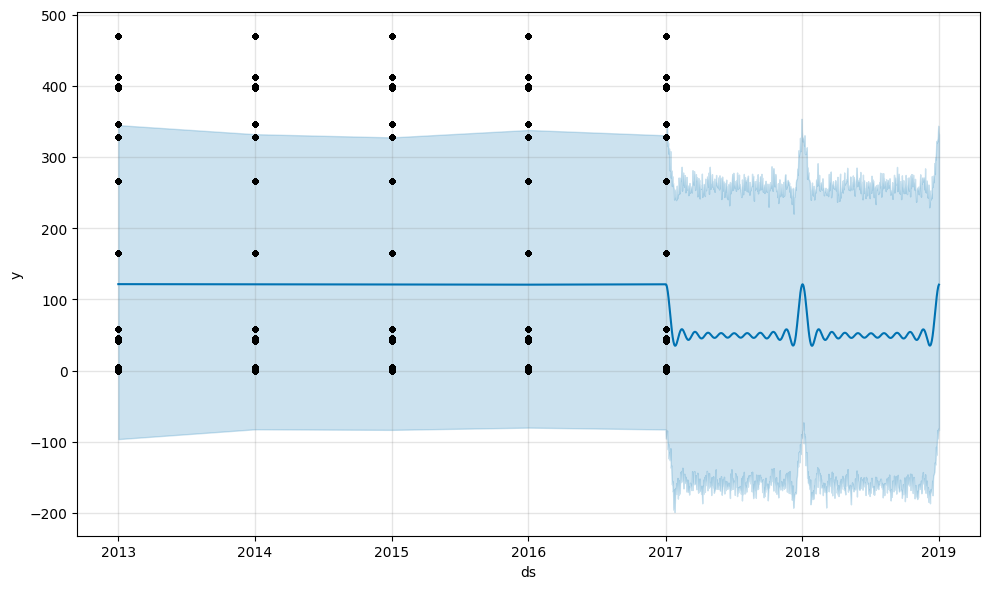

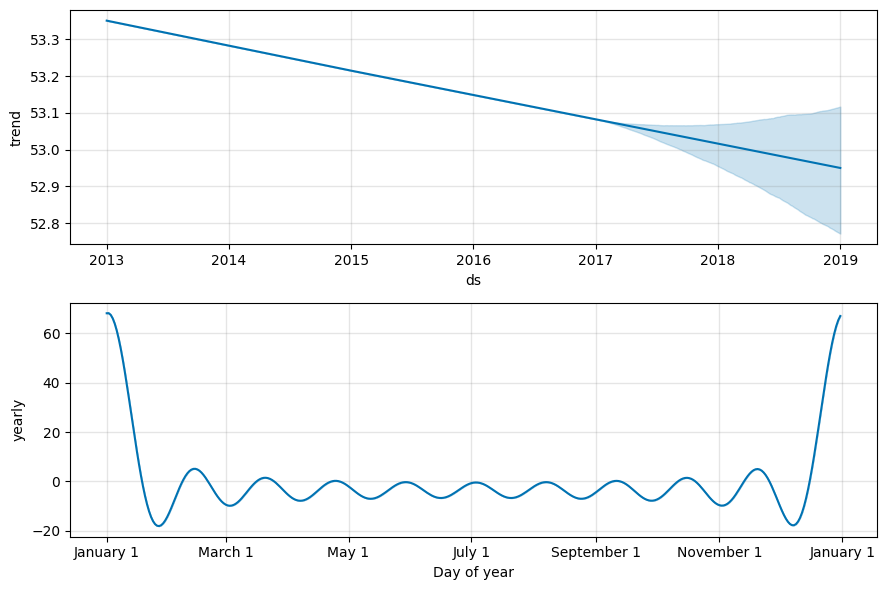

In [51]:
#Prophet
from prophet import Prophet
import pandas as pd

# Step 1: Prepare your data
df_prophet = one_county.reset_index().rename(columns={'date': 'ds', 'EPEST_DIFF_KG': 'y'})

# Step 2: Create and fit the Prophet model
model = Prophet()
model.fit(df_prophet)

# Step 3: Make future predictions for the next two years
future = model.make_future_dataframe(periods=730, freq='D')  # Adjust for leap years if necessary
forecast = model.predict(future)

# Extracting the predicted values
predicted_values = forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']]

# Display the predicted values
print(predicted_values.tail())  # Show the last few rows to see the future predictions

# Optional: Save the predicted values to a CSV file
predicted_values.to_csv('/content/drive/MyDrive/Conservatives-Official/Sameera-Data-collection/predicted_values_next_two_years.csv', index=False)

# Step 4: Plot the forecast
fig1 = model.plot(forecast)
fig2 = model.plot_components(forecast)




In [52]:
All_counties = final_high_est_df[['county_name','Year','EPEST_DIFF_KG']]
All_counties

,county_name,Year,EPEST_DIFF_KG
0,Autauga County,2013,661.9
1,Autauga County,2013,120.0
2,Autauga County,2013,86.7
3,Autauga County,2013,11.8
4,Autauga County,2013,14.6
...,...,...,...
1362464,Winston County,2017,0.0
1362465,Winston County,2017,3.5
1362466,Winston County,2017,2.5
1362467,Winston County,2017,11.2


# **All counties for state Alabama**

**Prophet**




In [55]:
#Prophet for all counties in the state of Alabama

from prophet import Prophet
import pandas as pd
import os

# Assuming All_counties DataFrame is prepared

# Convert 'Year' to datetime format and prepare the DataFrame for Prophet
All_counties['ds'] = pd.to_datetime(All_counties['Year'], format='%Y')
df_prophet = All_counties.rename(columns={'EPEST_DIFF_KG': 'y'}).drop('Year', axis=1)

# Aggregate the data by 'county_name' and 'ds', summing up 'y'
aggregated_df = df_prophet.groupby(['county_name', 'ds'], as_index=False)['y'].sum()

# Initialize an empty DataFrame to store all forecasts
all_forecasts = pd.DataFrame()

# Specify the directory for saving the pickle file
pickle_dir = "/content/drive/MyDrive/Conservatives-Official/Sameera-Data-collection"
if not os.path.exists(pickle_dir):
    os.makedirs(pickle_dir)

# Save the aggregated DataFrame to a pickle file
aggregated_pickle_path = os.path.join(pickle_dir, "aggregated_training_data.pkl")
aggregated_df.to_pickle(aggregated_pickle_path)
print(f"Aggregated training data saved to {aggregated_pickle_path}.")

# Continue with the forecasting process...

# Iterate over each unique county to perform forecasting
for county in aggregated_df['county_name'].unique():
    # Subset for the current county
    df_county = aggregated_df[aggregated_df['county_name'] == county][['ds', 'y']]

    # Create and fit the Prophet model
    model = Prophet()
    model.fit(df_county)

    # Make future predictions for the next two years
    future = model.make_future_dataframe(periods=24, freq='M')  # Monthly periods, adjust as needed
    forecast = model.predict(future)

    # Add county name to the forecast and keep relevant columns
    forecast['county_name'] = county
    forecast_relevant = forecast[['ds', 'county_name', 'yhat', 'yhat_lower', 'yhat_upper']].rename(columns={
        'ds': 'Date',
        'yhat': 'Predicted_Value',
        'yhat_lower': 'Lower_Prediction_Bound',
        'yhat_upper': 'Upper_Prediction_Bound'
    })

    # Append to the all_forecasts DataFrame
    all_forecasts = pd.concat([all_forecasts, forecast_relevant])

# Reset index of the consolidated DataFrame and save to a single CSV file
all_forecasts.reset_index(drop=True, inplace=True)
consolidated_csv_path = "/content/drive/MyDrive/Conservatives-Official/Sameera-Data-collection/All_counties_predicted_values.csv"
all_forecasts.to_csv(consolidated_csv_path, index=False)

print(f"Consolidated forecasting completed and saved to {consolidated_csv_path}.")




<ipython-input-55-beb6ac02ba9c>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  All_counties['ds'] = pd.to_datetime(All_counties['Year'], format='%Y')
INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:prophet:n_changepoints greater than number of observations. Using 3.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp_ibz637r/v1rwxg_d.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp_ibz637r/lfdbhlbu.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=85

Aggregated training data saved to /content/drive/MyDrive/Conservatives-Official/Sameera-Data-collection/aggregated_training_data.pkl.


01:36:19 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
01:36:19 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:prophet:n_changepoints greater than number of observations. Using 3.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp_ibz637r/ubgcuby1.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp_ibz637r/a8is7_mm.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=25117', 'data', 'file=/tmp/tmp_ibz637r/ubgcuby1.json', 'init=/tmp/tmp_ibz637r/a8is7_mm.json', 'output', 'file=/tmp/tmp_ibz637r/prophet_modelladhsb1v/prophet_model-20240303013619.csv', 'method=optimize',

Consolidated forecasting completed and saved to /content/drive/MyDrive/Conservatives-Official/Sameera-Data-collection/All_counties_predicted_values.csv.


**LSTM**

In [57]:
#LSTM for all counties in ALabama
from sklearn.preprocessing import MinMaxScaler
import pandas as pd
import numpy as np

# Assuming All_counties is your DataFrame
All_counties['Year'] = pd.to_datetime(All_counties['Year'], format='%Y')
All_counties = All_counties.groupby(['county_name', 'Year']).agg({'EPEST_DIFF_KG': 'sum'}).reset_index()

# Normalize the EPEST_DIFF_KG values
scaler = MinMaxScaler(feature_range=(0, 1))
All_counties['EPEST_DIFF_KG_scaled'] = scaler.fit_transform(All_counties[['EPEST_DIFF_KG']])

# Function to reshape data for LSTM
def create_dataset(dataset, look_back=1):
    dataX, dataY = [], []
    for i in range(len(dataset) - look_back):
        a = dataset[i:(i + look_back)]
        dataX.append(a)
        dataY.append(dataset[i + look_back])
    return np.array(dataX), np.array(dataY)


<ipython-input-57-557464d98e1d>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  All_counties['Year'] = pd.to_datetime(All_counties['Year'], format='%Y')


In [61]:
from keras.models import Sequential
from keras.layers import LSTM, Dense
import os

# Directories for saving models and predictions
if not os.path.exists('models'):
    os.makedirs('models')
if not os.path.exists('predictions'):
    os.makedirs('predictions')

all_predictions = pd.DataFrame()

for county in All_counties['county_name'].unique():
    county_df = All_counties[All_counties['county_name'] == county]
    dataset = county_df['EPEST_DIFF_KG_scaled'].values
    look_back = 1
    X, y = create_dataset(dataset, look_back)
    X = np.reshape(X, (X.shape[0], 1, X.shape[1]))

    # Split data into training and testing sets
    train_size = int(len(X) * 0.67)
    trainX, testX = X[:train_size], X[train_size:]
    trainY, testY = y[:train_size], y[train_size:]

    # LSTM model
    model = Sequential()
    model.add(LSTM(4, input_shape=(1, look_back)))
    model.add(Dense(1))
    model.compile(loss='mean_squared_error', optimizer='adam')
    model.fit(trainX, trainY, epochs=100, batch_size=1, verbose=2)

    # Save model
    model.save(f'/content/drive/MyDrive/Conservatives-Official/Sameera-Data-collection/{county.replace(" ", "_")}.h5')

    # Make predictions
    testPredict = model.predict(testX)

    # Invert predictions
    testPredict = scaler.inverse_transform(testPredict)
    testPredictions = pd.Series(data=testPredict.flatten(), name=f'{county}_Predicted')

    # Concatenate predictions to all_predictions DataFrame
    if all_predictions.empty:
        all_predictions = pd.DataFrame(testPredictions)
        all_predictions['Year'] = county_df['Year'][look_back+train_size:].reset_index(drop=True)
    else:
        temp_df = pd.DataFrame(testPredictions)
        temp_df['Year'] = county_df['Year'][look_back+train_size:].reset_index(drop=True)
        all_predictions = pd.merge(all_predictions, temp_df, on='Year', how='outer')

# Save the consolidated predictions to CSV
all_predictions.to_csv('/content/drive/MyDrive/Conservatives-Official/Sameera-Data-collection/LSTM_All_counties_predictions.csv', index=False)


Epoch 1/100
2/2 - 2s - loss: 0.0033 - 2s/epoch - 819ms/step
Epoch 2/100
2/2 - 0s - loss: 0.0029 - 8ms/epoch - 4ms/step
Epoch 3/100
2/2 - 0s - loss: 0.0026 - 8ms/epoch - 4ms/step
Epoch 4/100
2/2 - 0s - loss: 0.0023 - 10ms/epoch - 5ms/step
Epoch 5/100
2/2 - 0s - loss: 0.0020 - 8ms/epoch - 4ms/step
Epoch 6/100
2/2 - 0s - loss: 0.0017 - 8ms/epoch - 4ms/step
Epoch 7/100
2/2 - 0s - loss: 0.0014 - 9ms/epoch - 5ms/step
Epoch 8/100
2/2 - 0s - loss: 0.0012 - 8ms/epoch - 4ms/step
Epoch 9/100
2/2 - 0s - loss: 0.0010 - 9ms/epoch - 4ms/step
Epoch 10/100
2/2 - 0s - loss: 8.1257e-04 - 8ms/epoch - 4ms/step
Epoch 11/100
2/2 - 0s - loss: 6.6473e-04 - 8ms/epoch - 4ms/step
Epoch 12/100
2/2 - 0s - loss: 5.2176e-04 - 8ms/epoch - 4ms/step
Epoch 13/100
2/2 - 0s - loss: 4.0777e-04 - 8ms/epoch - 4ms/step
Epoch 14/100
2/2 - 0s - loss: 3.1234e-04 - 9ms/epoch - 4ms/step
Epoch 15/100
2/2 - 0s - loss: 2.4039e-04 - 8ms/epoch - 4ms/step
Epoch 16/100
2/2 - 0s - loss: 1.7627e-04 - 8ms/epoch - 4ms/step
Epoch 17/100
2/2 - 

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


1/1 [==============================] - 0s 397ms/step
Epoch 1/100
2/2 - 2s - loss: 0.2342 - 2s/epoch - 1s/step
Epoch 2/100
2/2 - 0s - loss: 0.2304 - 13ms/epoch - 6ms/step
Epoch 3/100
2/2 - 0s - loss: 0.2265 - 11ms/epoch - 6ms/step
Epoch 4/100
2/2 - 0s - loss: 0.2227 - 14ms/epoch - 7ms/step
Epoch 5/100
2/2 - 0s - loss: 0.2190 - 10ms/epoch - 5ms/step
Epoch 6/100
2/2 - 0s - loss: 0.2153 - 10ms/epoch - 5ms/step
Epoch 7/100
2/2 - 0s - loss: 0.2116 - 10ms/epoch - 5ms/step
Epoch 8/100
2/2 - 0s - loss: 0.2079 - 13ms/epoch - 6ms/step
Epoch 9/100
2/2 - 0s - loss: 0.2044 - 12ms/epoch - 6ms/step
Epoch 10/100
2/2 - 0s - loss: 0.2009 - 9ms/epoch - 5ms/step
Epoch 11/100
2/2 - 0s - loss: 0.1973 - 12ms/epoch - 6ms/step
Epoch 12/100
2/2 - 0s - loss: 0.1939 - 10ms/epoch - 5ms/step
Epoch 13/100
2/2 - 0s - loss: 0.1904 - 9ms/epoch - 5ms/step
Epoch 14/100
2/2 - 0s - loss: 0.1870 - 12ms/epoch - 6ms/step
Epoch 15/100
2/2 - 0s - loss: 0.1836 - 14ms/epoch - 7ms/step
Epoch 16/100
2/2 - 0s - loss: 0.1803 - 12ms/ep

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


1/1 [==============================] - 1s 512ms/step
Epoch 1/100
2/2 - 2s - loss: 0.0032 - 2s/epoch - 792ms/step
Epoch 2/100
2/2 - 0s - loss: 0.0029 - 10ms/epoch - 5ms/step
Epoch 3/100
2/2 - 0s - loss: 0.0025 - 9ms/epoch - 4ms/step
Epoch 4/100
2/2 - 0s - loss: 0.0022 - 9ms/epoch - 4ms/step
Epoch 5/100
2/2 - 0s - loss: 0.0019 - 7ms/epoch - 4ms/step
Epoch 6/100
2/2 - 0s - loss: 0.0016 - 7ms/epoch - 4ms/step
Epoch 7/100
2/2 - 0s - loss: 0.0013 - 7ms/epoch - 4ms/step
Epoch 8/100
2/2 - 0s - loss: 0.0011 - 7ms/epoch - 4ms/step
Epoch 9/100
2/2 - 0s - loss: 8.7516e-04 - 8ms/epoch - 4ms/step
Epoch 10/100
2/2 - 0s - loss: 7.0911e-04 - 9ms/epoch - 5ms/step
Epoch 11/100
2/2 - 0s - loss: 5.5642e-04 - 8ms/epoch - 4ms/step
Epoch 12/100
2/2 - 0s - loss: 4.2743e-04 - 7ms/epoch - 4ms/step
Epoch 13/100
2/2 - 0s - loss: 3.2055e-04 - 8ms/epoch - 4ms/step
Epoch 14/100
2/2 - 0s - loss: 2.3393e-04 - 8ms/epoch - 4ms/step
Epoch 15/100
2/2 - 0s - loss: 1.6555e-04 - 11ms/epoch - 5ms/step
Epoch 16/100
2/2 - 0s - l

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


1/1 [==============================] - 0s 395ms/step
Epoch 1/100
2/2 - 2s - loss: 0.0049 - 2s/epoch - 789ms/step
Epoch 2/100
2/2 - 0s - loss: 0.0045 - 10ms/epoch - 5ms/step
Epoch 3/100
2/2 - 0s - loss: 0.0041 - 9ms/epoch - 5ms/step
Epoch 4/100
2/2 - 0s - loss: 0.0037 - 8ms/epoch - 4ms/step
Epoch 5/100
2/2 - 0s - loss: 0.0033 - 9ms/epoch - 4ms/step
Epoch 6/100
2/2 - 0s - loss: 0.0029 - 9ms/epoch - 5ms/step
Epoch 7/100
2/2 - 0s - loss: 0.0026 - 9ms/epoch - 5ms/step
Epoch 8/100
2/2 - 0s - loss: 0.0023 - 9ms/epoch - 5ms/step
Epoch 9/100
2/2 - 0s - loss: 0.0020 - 9ms/epoch - 4ms/step
Epoch 10/100
2/2 - 0s - loss: 0.0018 - 8ms/epoch - 4ms/step
Epoch 11/100
2/2 - 0s - loss: 0.0015 - 8ms/epoch - 4ms/step
Epoch 12/100
2/2 - 0s - loss: 0.0013 - 9ms/epoch - 4ms/step
Epoch 13/100
2/2 - 0s - loss: 0.0012 - 11ms/epoch - 5ms/step
Epoch 14/100
2/2 - 0s - loss: 9.7104e-04 - 10ms/epoch - 5ms/step
Epoch 15/100
2/2 - 0s - loss: 8.2027e-04 - 8ms/epoch - 4ms/step
Epoch 16/100
2/2 - 0s - loss: 6.9480e-04 - 9

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


1/1 [==============================] - 0s 407ms/step
Epoch 1/100
2/2 - 2s - loss: 0.0097 - 2s/epoch - 780ms/step
Epoch 2/100
2/2 - 0s - loss: 0.0089 - 12ms/epoch - 6ms/step
Epoch 3/100
2/2 - 0s - loss: 0.0083 - 9ms/epoch - 5ms/step
Epoch 4/100
2/2 - 0s - loss: 0.0076 - 11ms/epoch - 6ms/step
Epoch 5/100
2/2 - 0s - loss: 0.0070 - 8ms/epoch - 4ms/step
Epoch 6/100
2/2 - 0s - loss: 0.0064 - 10ms/epoch - 5ms/step
Epoch 7/100
2/2 - 0s - loss: 0.0058 - 11ms/epoch - 5ms/step
Epoch 8/100
2/2 - 0s - loss: 0.0053 - 14ms/epoch - 7ms/step
Epoch 9/100
2/2 - 0s - loss: 0.0048 - 8ms/epoch - 4ms/step
Epoch 10/100
2/2 - 0s - loss: 0.0043 - 8ms/epoch - 4ms/step
Epoch 11/100
2/2 - 0s - loss: 0.0039 - 7ms/epoch - 4ms/step
Epoch 12/100
2/2 - 0s - loss: 0.0035 - 7ms/epoch - 4ms/step
Epoch 13/100
2/2 - 0s - loss: 0.0031 - 8ms/epoch - 4ms/step
Epoch 14/100
2/2 - 0s - loss: 0.0027 - 7ms/epoch - 4ms/step
Epoch 15/100
2/2 - 0s - loss: 0.0024 - 8ms/epoch - 4ms/step
Epoch 16/100
2/2 - 0s - loss: 0.0021 - 9ms/epoch -

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


1/1 [==============================] - 1s 581ms/step
Epoch 1/100
2/2 - 2s - loss: 7.3858e-04 - 2s/epoch - 948ms/step
Epoch 2/100
2/2 - 0s - loss: 5.7258e-04 - 9ms/epoch - 4ms/step
Epoch 3/100
2/2 - 0s - loss: 4.3736e-04 - 8ms/epoch - 4ms/step
Epoch 4/100
2/2 - 0s - loss: 3.1398e-04 - 9ms/epoch - 4ms/step
Epoch 5/100
2/2 - 0s - loss: 2.1678e-04 - 8ms/epoch - 4ms/step
Epoch 6/100
2/2 - 0s - loss: 1.4411e-04 - 8ms/epoch - 4ms/step
Epoch 7/100
2/2 - 0s - loss: 8.1967e-05 - 9ms/epoch - 4ms/step
Epoch 8/100
2/2 - 0s - loss: 4.5806e-05 - 10ms/epoch - 5ms/step
Epoch 9/100
2/2 - 0s - loss: 2.0515e-05 - 8ms/epoch - 4ms/step
Epoch 10/100
2/2 - 0s - loss: 4.5886e-06 - 8ms/epoch - 4ms/step
Epoch 11/100
2/2 - 0s - loss: 1.3129e-06 - 11ms/epoch - 5ms/step
Epoch 12/100
2/2 - 0s - loss: 5.9822e-06 - 10ms/epoch - 5ms/step
Epoch 13/100
2/2 - 0s - loss: 9.1488e-06 - 9ms/epoch - 5ms/step
Epoch 14/100
2/2 - 0s - loss: 1.5951e-05 - 11ms/epoch - 5ms/step
Epoch 15/100
2/2 - 0s - loss: 1.9987e-05 - 13ms/epoch -

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


1/1 [==============================] - 1s 805ms/step
Epoch 1/100
2/2 - 4s - loss: 0.0025 - 4s/epoch - 2s/step
Epoch 2/100
2/2 - 0s - loss: 0.0022 - 13ms/epoch - 6ms/step
Epoch 3/100
2/2 - 0s - loss: 0.0020 - 12ms/epoch - 6ms/step
Epoch 4/100
2/2 - 0s - loss: 0.0017 - 12ms/epoch - 6ms/step
Epoch 5/100
2/2 - 0s - loss: 0.0015 - 11ms/epoch - 6ms/step
Epoch 6/100
2/2 - 0s - loss: 0.0013 - 11ms/epoch - 6ms/step
Epoch 7/100
2/2 - 0s - loss: 0.0011 - 10ms/epoch - 5ms/step
Epoch 8/100
2/2 - 0s - loss: 9.2609e-04 - 11ms/epoch - 5ms/step
Epoch 9/100
2/2 - 0s - loss: 7.6994e-04 - 11ms/epoch - 5ms/step
Epoch 10/100
2/2 - 0s - loss: 6.2496e-04 - 11ms/epoch - 6ms/step
Epoch 11/100
2/2 - 0s - loss: 5.0482e-04 - 18ms/epoch - 9ms/step
Epoch 12/100
2/2 - 0s - loss: 4.0093e-04 - 12ms/epoch - 6ms/step
Epoch 13/100
2/2 - 0s - loss: 3.1243e-04 - 22ms/epoch - 11ms/step
Epoch 14/100
2/2 - 0s - loss: 2.4409e-04 - 26ms/epoch - 13ms/step
Epoch 15/100
2/2 - 0s - loss: 1.7694e-04 - 16ms/epoch - 8ms/step
Epoch 16/1

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


1/1 [==============================] - 1s 1s/step
Epoch 1/100
2/2 - 2s - loss: 0.0126 - 2s/epoch - 918ms/step
Epoch 2/100
2/2 - 0s - loss: 0.0119 - 12ms/epoch - 6ms/step
Epoch 3/100
2/2 - 0s - loss: 0.0111 - 9ms/epoch - 4ms/step
Epoch 4/100
2/2 - 0s - loss: 0.0104 - 8ms/epoch - 4ms/step
Epoch 5/100
2/2 - 0s - loss: 0.0097 - 9ms/epoch - 5ms/step
Epoch 6/100
2/2 - 0s - loss: 0.0091 - 9ms/epoch - 5ms/step
Epoch 7/100
2/2 - 0s - loss: 0.0084 - 9ms/epoch - 4ms/step
Epoch 8/100
2/2 - 0s - loss: 0.0079 - 8ms/epoch - 4ms/step
Epoch 9/100
2/2 - 0s - loss: 0.0073 - 9ms/epoch - 4ms/step
Epoch 10/100
2/2 - 0s - loss: 0.0067 - 9ms/epoch - 5ms/step
Epoch 11/100
2/2 - 0s - loss: 0.0062 - 11ms/epoch - 6ms/step
Epoch 12/100
2/2 - 0s - loss: 0.0057 - 10ms/epoch - 5ms/step
Epoch 13/100
2/2 - 0s - loss: 0.0053 - 8ms/epoch - 4ms/step
Epoch 14/100
2/2 - 0s - loss: 0.0048 - 9ms/epoch - 4ms/step
Epoch 15/100
2/2 - 0s - loss: 0.0044 - 11ms/epoch - 5ms/step
Epoch 16/100
2/2 - 0s - loss: 0.0040 - 10ms/epoch - 5m

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


1/1 [==============================] - 0s 390ms/step
Epoch 1/100
2/2 - 2s - loss: 0.0184 - 2s/epoch - 806ms/step
Epoch 2/100
2/2 - 0s - loss: 0.0174 - 9ms/epoch - 5ms/step
Epoch 3/100
2/2 - 0s - loss: 0.0164 - 9ms/epoch - 5ms/step
Epoch 4/100
2/2 - 0s - loss: 0.0154 - 8ms/epoch - 4ms/step
Epoch 5/100
2/2 - 0s - loss: 0.0145 - 9ms/epoch - 5ms/step
Epoch 6/100
2/2 - 0s - loss: 0.0137 - 9ms/epoch - 4ms/step
Epoch 7/100
2/2 - 0s - loss: 0.0128 - 10ms/epoch - 5ms/step
Epoch 8/100
2/2 - 0s - loss: 0.0120 - 8ms/epoch - 4ms/step
Epoch 9/100
2/2 - 0s - loss: 0.0112 - 10ms/epoch - 5ms/step
Epoch 10/100
2/2 - 0s - loss: 0.0105 - 9ms/epoch - 5ms/step
Epoch 11/100
2/2 - 0s - loss: 0.0098 - 12ms/epoch - 6ms/step
Epoch 12/100
2/2 - 0s - loss: 0.0091 - 8ms/epoch - 4ms/step
Epoch 13/100
2/2 - 0s - loss: 0.0084 - 9ms/epoch - 4ms/step
Epoch 14/100
2/2 - 0s - loss: 0.0078 - 9ms/epoch - 5ms/step
Epoch 15/100
2/2 - 0s - loss: 0.0072 - 9ms/epoch - 4ms/step
Epoch 16/100
2/2 - 0s - loss: 0.0067 - 10ms/epoch - 

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


1/1 [==============================] - 0s 384ms/step
Epoch 1/100
2/2 - 2s - loss: 0.3135 - 2s/epoch - 982ms/step
Epoch 2/100
2/2 - 0s - loss: 0.3094 - 13ms/epoch - 6ms/step
Epoch 3/100
2/2 - 0s - loss: 0.3053 - 14ms/epoch - 7ms/step
Epoch 4/100
2/2 - 0s - loss: 0.3014 - 10ms/epoch - 5ms/step
Epoch 5/100
2/2 - 0s - loss: 0.2973 - 11ms/epoch - 5ms/step
Epoch 6/100
2/2 - 0s - loss: 0.2933 - 16ms/epoch - 8ms/step
Epoch 7/100
2/2 - 0s - loss: 0.2893 - 12ms/epoch - 6ms/step
Epoch 8/100
2/2 - 0s - loss: 0.2853 - 14ms/epoch - 7ms/step
Epoch 9/100
2/2 - 0s - loss: 0.2815 - 19ms/epoch - 10ms/step
Epoch 10/100
2/2 - 0s - loss: 0.2775 - 12ms/epoch - 6ms/step
Epoch 11/100
2/2 - 0s - loss: 0.2736 - 12ms/epoch - 6ms/step
Epoch 12/100
2/2 - 0s - loss: 0.2699 - 12ms/epoch - 6ms/step
Epoch 13/100
2/2 - 0s - loss: 0.2661 - 13ms/epoch - 7ms/step
Epoch 14/100
2/2 - 0s - loss: 0.2623 - 13ms/epoch - 6ms/step
Epoch 15/100
2/2 - 0s - loss: 0.2585 - 10ms/epoch - 5ms/step
Epoch 16/100
2/2 - 0s - loss: 0.2547 - 1

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


1/1 [==============================] - 0s 499ms/step
Epoch 1/100
2/2 - 2s - loss: 0.0253 - 2s/epoch - 792ms/step
Epoch 2/100
2/2 - 0s - loss: 0.0242 - 10ms/epoch - 5ms/step
Epoch 3/100
2/2 - 0s - loss: 0.0231 - 10ms/epoch - 5ms/step
Epoch 4/100
2/2 - 0s - loss: 0.0221 - 8ms/epoch - 4ms/step
Epoch 5/100
2/2 - 0s - loss: 0.0211 - 9ms/epoch - 4ms/step
Epoch 6/100
2/2 - 0s - loss: 0.0200 - 9ms/epoch - 4ms/step
Epoch 7/100
2/2 - 0s - loss: 0.0191 - 9ms/epoch - 5ms/step
Epoch 8/100
2/2 - 0s - loss: 0.0181 - 10ms/epoch - 5ms/step
Epoch 9/100
2/2 - 0s - loss: 0.0172 - 9ms/epoch - 5ms/step
Epoch 10/100
2/2 - 0s - loss: 0.0164 - 9ms/epoch - 4ms/step
Epoch 11/100
2/2 - 0s - loss: 0.0155 - 11ms/epoch - 6ms/step
Epoch 12/100
2/2 - 0s - loss: 0.0147 - 9ms/epoch - 5ms/step
Epoch 13/100
2/2 - 0s - loss: 0.0139 - 8ms/epoch - 4ms/step
Epoch 14/100
2/2 - 0s - loss: 0.0131 - 9ms/epoch - 5ms/step
Epoch 15/100
2/2 - 0s - loss: 0.0124 - 9ms/epoch - 4ms/step
Epoch 16/100
2/2 - 0s - loss: 0.0117 - 9ms/epoch - 

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


1/1 [==============================] - 0s 392ms/step
Epoch 1/100
2/2 - 2s - loss: 4.4198e-05 - 2s/epoch - 813ms/step
Epoch 2/100
2/2 - 0s - loss: 1.3359e-05 - 11ms/epoch - 5ms/step
Epoch 3/100
2/2 - 0s - loss: 7.9899e-07 - 10ms/epoch - 5ms/step
Epoch 4/100
2/2 - 0s - loss: 3.1873e-06 - 8ms/epoch - 4ms/step
Epoch 5/100
2/2 - 0s - loss: 8.4454e-06 - 12ms/epoch - 6ms/step
Epoch 6/100
2/2 - 0s - loss: 1.0223e-05 - 9ms/epoch - 4ms/step
Epoch 7/100
2/2 - 0s - loss: 7.5350e-06 - 8ms/epoch - 4ms/step
Epoch 8/100
2/2 - 0s - loss: 4.1222e-06 - 11ms/epoch - 5ms/step
Epoch 9/100
2/2 - 0s - loss: 6.7519e-07 - 9ms/epoch - 4ms/step
Epoch 10/100
2/2 - 0s - loss: 9.2124e-07 - 12ms/epoch - 6ms/step
Epoch 11/100
2/2 - 0s - loss: 1.9709e-06 - 10ms/epoch - 5ms/step
Epoch 12/100
2/2 - 0s - loss: 2.7351e-06 - 9ms/epoch - 4ms/step
Epoch 13/100
2/2 - 0s - loss: 2.7208e-06 - 13ms/epoch - 6ms/step
Epoch 14/100
2/2 - 0s - loss: 1.8090e-06 - 9ms/epoch - 4ms/step
Epoch 15/100
2/2 - 0s - loss: 1.1276e-06 - 8ms/epoch

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


1/1 [==============================] - 0s 384ms/step
Epoch 1/100
2/2 - 2s - loss: 3.2277e-07 - 2s/epoch - 928ms/step
Epoch 2/100
2/2 - 0s - loss: 4.9684e-10 - 10ms/epoch - 5ms/step
Epoch 3/100
2/2 - 0s - loss: 5.8924e-07 - 9ms/epoch - 5ms/step
Epoch 4/100
2/2 - 0s - loss: 5.7523e-08 - 9ms/epoch - 4ms/step
Epoch 5/100
2/2 - 0s - loss: 5.0281e-07 - 9ms/epoch - 4ms/step
Epoch 6/100
2/2 - 0s - loss: 4.8444e-08 - 13ms/epoch - 7ms/step
Epoch 7/100
2/2 - 0s - loss: 2.0095e-07 - 13ms/epoch - 7ms/step
Epoch 8/100
2/2 - 0s - loss: 1.5746e-07 - 8ms/epoch - 4ms/step
Epoch 9/100
2/2 - 0s - loss: 6.8705e-08 - 8ms/epoch - 4ms/step
Epoch 10/100
2/2 - 0s - loss: 2.7991e-07 - 8ms/epoch - 4ms/step
Epoch 11/100
2/2 - 0s - loss: 2.5024e-07 - 8ms/epoch - 4ms/step
Epoch 12/100
2/2 - 0s - loss: 2.7458e-07 - 8ms/epoch - 4ms/step
Epoch 13/100
2/2 - 0s - loss: 1.3116e-07 - 8ms/epoch - 4ms/step
Epoch 14/100
2/2 - 0s - loss: 8.2261e-08 - 8ms/epoch - 4ms/step
Epoch 15/100
2/2 - 0s - loss: 2.9500e-07 - 8ms/epoch - 4

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


1/1 [==============================] - 1s 629ms/step
Epoch 1/100
2/2 - 2s - loss: 0.0159 - 2s/epoch - 926ms/step
Epoch 2/100
2/2 - 0s - loss: 0.0151 - 8ms/epoch - 4ms/step
Epoch 3/100
2/2 - 0s - loss: 0.0143 - 10ms/epoch - 5ms/step
Epoch 4/100
2/2 - 0s - loss: 0.0135 - 8ms/epoch - 4ms/step
Epoch 5/100
2/2 - 0s - loss: 0.0128 - 10ms/epoch - 5ms/step
Epoch 6/100
2/2 - 0s - loss: 0.0120 - 8ms/epoch - 4ms/step
Epoch 7/100
2/2 - 0s - loss: 0.0113 - 9ms/epoch - 5ms/step
Epoch 8/100
2/2 - 0s - loss: 0.0106 - 9ms/epoch - 5ms/step
Epoch 9/100
2/2 - 0s - loss: 0.0100 - 10ms/epoch - 5ms/step
Epoch 10/100
2/2 - 0s - loss: 0.0093 - 9ms/epoch - 4ms/step
Epoch 11/100
2/2 - 0s - loss: 0.0087 - 10ms/epoch - 5ms/step
Epoch 12/100
2/2 - 0s - loss: 0.0082 - 8ms/epoch - 4ms/step
Epoch 13/100
2/2 - 0s - loss: 0.0076 - 10ms/epoch - 5ms/step
Epoch 14/100
2/2 - 0s - loss: 0.0071 - 10ms/epoch - 5ms/step
Epoch 15/100
2/2 - 0s - loss: 0.0066 - 8ms/epoch - 4ms/step
Epoch 16/100
2/2 - 0s - loss: 0.0061 - 9ms/epoch 

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


1/1 [==============================] - 0s 387ms/step
Epoch 1/100
2/2 - 2s - loss: 3.2081e-05 - 2s/epoch - 787ms/step
Epoch 2/100
2/2 - 0s - loss: 8.8991e-06 - 11ms/epoch - 5ms/step
Epoch 3/100
2/2 - 0s - loss: 5.0689e-08 - 9ms/epoch - 4ms/step
Epoch 4/100
2/2 - 0s - loss: 2.6044e-06 - 11ms/epoch - 5ms/step
Epoch 5/100
2/2 - 0s - loss: 6.4272e-06 - 8ms/epoch - 4ms/step
Epoch 6/100
2/2 - 0s - loss: 6.6839e-06 - 11ms/epoch - 5ms/step
Epoch 7/100
2/2 - 0s - loss: 3.8258e-06 - 9ms/epoch - 5ms/step
Epoch 8/100
2/2 - 0s - loss: 1.1821e-06 - 9ms/epoch - 5ms/step
Epoch 9/100
2/2 - 0s - loss: 1.3823e-07 - 11ms/epoch - 6ms/step
Epoch 10/100
2/2 - 0s - loss: 7.3198e-07 - 13ms/epoch - 6ms/step
Epoch 11/100
2/2 - 0s - loss: 2.0482e-06 - 9ms/epoch - 5ms/step
Epoch 12/100
2/2 - 0s - loss: 2.3043e-06 - 11ms/epoch - 5ms/step
Epoch 13/100
2/2 - 0s - loss: 1.7900e-06 - 10ms/epoch - 5ms/step
Epoch 14/100
2/2 - 0s - loss: 6.1674e-07 - 8ms/epoch - 4ms/step
Epoch 15/100
2/2 - 0s - loss: 5.6388e-07 - 9ms/epoch

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


1/1 [==============================] - 0s 401ms/step
Epoch 1/100
2/2 - 2s - loss: 0.0304 - 2s/epoch - 978ms/step
Epoch 2/100
2/2 - 0s - loss: 0.0293 - 12ms/epoch - 6ms/step
Epoch 3/100
2/2 - 0s - loss: 0.0282 - 11ms/epoch - 5ms/step
Epoch 4/100
2/2 - 0s - loss: 0.0271 - 12ms/epoch - 6ms/step
Epoch 5/100
2/2 - 0s - loss: 0.0260 - 10ms/epoch - 5ms/step
Epoch 6/100
2/2 - 0s - loss: 0.0250 - 15ms/epoch - 8ms/step
Epoch 7/100
2/2 - 0s - loss: 0.0240 - 10ms/epoch - 5ms/step
Epoch 8/100
2/2 - 0s - loss: 0.0230 - 9ms/epoch - 5ms/step
Epoch 9/100
2/2 - 0s - loss: 0.0220 - 8ms/epoch - 4ms/step
Epoch 10/100
2/2 - 0s - loss: 0.0211 - 8ms/epoch - 4ms/step
Epoch 11/100
2/2 - 0s - loss: 0.0202 - 8ms/epoch - 4ms/step
Epoch 12/100
2/2 - 0s - loss: 0.0193 - 9ms/epoch - 4ms/step
Epoch 13/100
2/2 - 0s - loss: 0.0184 - 8ms/epoch - 4ms/step
Epoch 14/100
2/2 - 0s - loss: 0.0176 - 8ms/epoch - 4ms/step
Epoch 15/100
2/2 - 0s - loss: 0.0168 - 8ms/epoch - 4ms/step
Epoch 16/100
2/2 - 0s - loss: 0.0160 - 8ms/epoch 

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


1/1 [==============================] - 1s 544ms/step
Epoch 1/100
2/2 - 4s - loss: 0.1729 - 4s/epoch - 2s/step
Epoch 2/100
2/2 - 0s - loss: 0.1701 - 12ms/epoch - 6ms/step
Epoch 3/100
2/2 - 0s - loss: 0.1671 - 9ms/epoch - 4ms/step
Epoch 4/100
2/2 - 0s - loss: 0.1643 - 8ms/epoch - 4ms/step
Epoch 5/100
2/2 - 0s - loss: 0.1615 - 10ms/epoch - 5ms/step
Epoch 6/100
2/2 - 0s - loss: 0.1586 - 12ms/epoch - 6ms/step
Epoch 7/100
2/2 - 0s - loss: 0.1558 - 10ms/epoch - 5ms/step
Epoch 8/100
2/2 - 0s - loss: 0.1530 - 10ms/epoch - 5ms/step
Epoch 9/100
2/2 - 0s - loss: 0.1502 - 10ms/epoch - 5ms/step
Epoch 10/100
2/2 - 0s - loss: 0.1475 - 9ms/epoch - 5ms/step
Epoch 11/100
2/2 - 0s - loss: 0.1448 - 9ms/epoch - 5ms/step
Epoch 12/100
2/2 - 0s - loss: 0.1422 - 10ms/epoch - 5ms/step
Epoch 13/100
2/2 - 0s - loss: 0.1394 - 13ms/epoch - 6ms/step
Epoch 14/100
2/2 - 0s - loss: 0.1368 - 9ms/epoch - 5ms/step
Epoch 15/100
2/2 - 0s - loss: 0.1342 - 9ms/epoch - 5ms/step
Epoch 16/100
2/2 - 0s - loss: 0.1316 - 11ms/epoch 

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


1/1 [==============================] - 0s 410ms/step
Epoch 1/100
2/2 - 2s - loss: 0.0012 - 2s/epoch - 793ms/step
Epoch 2/100
2/2 - 0s - loss: 9.7659e-04 - 12ms/epoch - 6ms/step
Epoch 3/100
2/2 - 0s - loss: 7.7720e-04 - 10ms/epoch - 5ms/step
Epoch 4/100
2/2 - 0s - loss: 6.0758e-04 - 11ms/epoch - 5ms/step
Epoch 5/100
2/2 - 0s - loss: 4.6101e-04 - 10ms/epoch - 5ms/step
Epoch 6/100
2/2 - 0s - loss: 3.4303e-04 - 12ms/epoch - 6ms/step
Epoch 7/100
2/2 - 0s - loss: 2.3568e-04 - 13ms/epoch - 6ms/step
Epoch 8/100
2/2 - 0s - loss: 1.5592e-04 - 10ms/epoch - 5ms/step
Epoch 9/100
2/2 - 0s - loss: 1.0061e-04 - 10ms/epoch - 5ms/step
Epoch 10/100
2/2 - 0s - loss: 5.7198e-05 - 10ms/epoch - 5ms/step
Epoch 11/100
2/2 - 0s - loss: 2.4781e-05 - 10ms/epoch - 5ms/step
Epoch 12/100
2/2 - 0s - loss: 9.3887e-06 - 10ms/epoch - 5ms/step
Epoch 13/100
2/2 - 0s - loss: 6.3703e-06 - 12ms/epoch - 6ms/step
Epoch 14/100
2/2 - 0s - loss: 3.0379e-06 - 11ms/epoch - 5ms/step
Epoch 15/100
2/2 - 0s - loss: 6.5955e-06 - 12ms/ep

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


1/1 [==============================] - 1s 555ms/step
Epoch 1/100
2/2 - 2s - loss: 0.0027 - 2s/epoch - 1s/step
Epoch 2/100
2/2 - 0s - loss: 0.0024 - 12ms/epoch - 6ms/step
Epoch 3/100
2/2 - 0s - loss: 0.0021 - 11ms/epoch - 5ms/step
Epoch 4/100
2/2 - 0s - loss: 0.0018 - 9ms/epoch - 5ms/step
Epoch 5/100
2/2 - 0s - loss: 0.0016 - 10ms/epoch - 5ms/step
Epoch 6/100
2/2 - 0s - loss: 0.0013 - 10ms/epoch - 5ms/step
Epoch 7/100
2/2 - 0s - loss: 0.0011 - 9ms/epoch - 4ms/step
Epoch 8/100
2/2 - 0s - loss: 9.0597e-04 - 10ms/epoch - 5ms/step
Epoch 9/100
2/2 - 0s - loss: 7.3594e-04 - 10ms/epoch - 5ms/step
Epoch 10/100
2/2 - 0s - loss: 5.8749e-04 - 10ms/epoch - 5ms/step
Epoch 11/100
2/2 - 0s - loss: 4.6744e-04 - 10ms/epoch - 5ms/step
Epoch 12/100
2/2 - 0s - loss: 3.5850e-04 - 10ms/epoch - 5ms/step
Epoch 13/100
2/2 - 0s - loss: 2.6136e-04 - 9ms/epoch - 4ms/step
Epoch 14/100
2/2 - 0s - loss: 1.9589e-04 - 10ms/epoch - 5ms/step
Epoch 15/100
2/2 - 0s - loss: 1.3808e-04 - 11ms/epoch - 5ms/step
Epoch 16/100
2/

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


1/1 [==============================] - 0s 403ms/step
Epoch 1/100
2/2 - 2s - loss: 0.0118 - 2s/epoch - 792ms/step
Epoch 2/100
2/2 - 0s - loss: 0.0111 - 11ms/epoch - 6ms/step
Epoch 3/100
2/2 - 0s - loss: 0.0104 - 12ms/epoch - 6ms/step
Epoch 4/100
2/2 - 0s - loss: 0.0097 - 11ms/epoch - 5ms/step
Epoch 5/100
2/2 - 0s - loss: 0.0091 - 11ms/epoch - 6ms/step
Epoch 6/100
2/2 - 0s - loss: 0.0084 - 10ms/epoch - 5ms/step
Epoch 7/100
2/2 - 0s - loss: 0.0078 - 9ms/epoch - 5ms/step
Epoch 8/100
2/2 - 0s - loss: 0.0073 - 9ms/epoch - 4ms/step
Epoch 9/100
2/2 - 0s - loss: 0.0067 - 8ms/epoch - 4ms/step
Epoch 10/100
2/2 - 0s - loss: 0.0062 - 8ms/epoch - 4ms/step
Epoch 11/100
2/2 - 0s - loss: 0.0057 - 9ms/epoch - 5ms/step
Epoch 12/100
2/2 - 0s - loss: 0.0052 - 9ms/epoch - 4ms/step
Epoch 13/100
2/2 - 0s - loss: 0.0047 - 9ms/epoch - 5ms/step
Epoch 14/100
2/2 - 0s - loss: 0.0043 - 10ms/epoch - 5ms/step
Epoch 15/100
2/2 - 0s - loss: 0.0040 - 9ms/epoch - 5ms/step
Epoch 16/100
2/2 - 0s - loss: 0.0036 - 9ms/epoch 

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


1/1 [==============================] - 0s 384ms/step
Epoch 1/100
2/2 - 2s - loss: 0.0015 - 2s/epoch - 794ms/step
Epoch 2/100
2/2 - 0s - loss: 0.0013 - 12ms/epoch - 6ms/step
Epoch 3/100
2/2 - 0s - loss: 0.0011 - 17ms/epoch - 8ms/step
Epoch 4/100
2/2 - 0s - loss: 8.7477e-04 - 10ms/epoch - 5ms/step
Epoch 5/100
2/2 - 0s - loss: 7.0895e-04 - 10ms/epoch - 5ms/step
Epoch 6/100
2/2 - 0s - loss: 5.5786e-04 - 10ms/epoch - 5ms/step
Epoch 7/100
2/2 - 0s - loss: 4.2834e-04 - 9ms/epoch - 5ms/step
Epoch 8/100
2/2 - 0s - loss: 3.1383e-04 - 10ms/epoch - 5ms/step
Epoch 9/100
2/2 - 0s - loss: 2.2536e-04 - 9ms/epoch - 5ms/step
Epoch 10/100
2/2 - 0s - loss: 1.5484e-04 - 10ms/epoch - 5ms/step
Epoch 11/100
2/2 - 0s - loss: 1.0557e-04 - 10ms/epoch - 5ms/step
Epoch 12/100
2/2 - 0s - loss: 6.0617e-05 - 9ms/epoch - 5ms/step
Epoch 13/100
2/2 - 0s - loss: 3.3428e-05 - 9ms/epoch - 5ms/step
Epoch 14/100
2/2 - 0s - loss: 2.0119e-05 - 9ms/epoch - 5ms/step
Epoch 15/100
2/2 - 0s - loss: 7.0373e-06 - 9ms/epoch - 4ms/step

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


1/1 [==============================] - 1s 555ms/step
Epoch 1/100
2/2 - 2s - loss: 0.0279 - 2s/epoch - 923ms/step
Epoch 2/100
2/2 - 0s - loss: 0.0269 - 12ms/epoch - 6ms/step
Epoch 3/100
2/2 - 0s - loss: 0.0259 - 10ms/epoch - 5ms/step
Epoch 4/100
2/2 - 0s - loss: 0.0250 - 11ms/epoch - 5ms/step
Epoch 5/100
2/2 - 0s - loss: 0.0240 - 10ms/epoch - 5ms/step
Epoch 6/100
2/2 - 0s - loss: 0.0232 - 10ms/epoch - 5ms/step
Epoch 7/100
2/2 - 0s - loss: 0.0223 - 12ms/epoch - 6ms/step
Epoch 8/100
2/2 - 0s - loss: 0.0214 - 10ms/epoch - 5ms/step
Epoch 9/100
2/2 - 0s - loss: 0.0205 - 9ms/epoch - 5ms/step
Epoch 10/100
2/2 - 0s - loss: 0.0197 - 11ms/epoch - 6ms/step
Epoch 11/100
2/2 - 0s - loss: 0.0189 - 9ms/epoch - 4ms/step
Epoch 12/100
2/2 - 0s - loss: 0.0181 - 10ms/epoch - 5ms/step
Epoch 13/100
2/2 - 0s - loss: 0.0174 - 9ms/epoch - 5ms/step
Epoch 14/100
2/2 - 0s - loss: 0.0166 - 9ms/epoch - 4ms/step
Epoch 15/100
2/2 - 0s - loss: 0.0159 - 9ms/epoch - 5ms/step
Epoch 16/100
2/2 - 0s - loss: 0.0152 - 9ms/epo

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


1/1 [==============================] - 0s 391ms/step
Epoch 1/100
2/2 - 2s - loss: 0.0100 - 2s/epoch - 805ms/step
Epoch 2/100
2/2 - 0s - loss: 0.0094 - 11ms/epoch - 5ms/step
Epoch 3/100
2/2 - 0s - loss: 0.0089 - 11ms/epoch - 5ms/step
Epoch 4/100
2/2 - 0s - loss: 0.0083 - 12ms/epoch - 6ms/step
Epoch 5/100
2/2 - 0s - loss: 0.0078 - 11ms/epoch - 6ms/step
Epoch 6/100
2/2 - 0s - loss: 0.0073 - 9ms/epoch - 4ms/step
Epoch 7/100
2/2 - 0s - loss: 0.0068 - 9ms/epoch - 4ms/step
Epoch 8/100
2/2 - 0s - loss: 0.0063 - 8ms/epoch - 4ms/step
Epoch 9/100
2/2 - 0s - loss: 0.0059 - 8ms/epoch - 4ms/step
Epoch 10/100
2/2 - 0s - loss: 0.0055 - 8ms/epoch - 4ms/step
Epoch 11/100
2/2 - 0s - loss: 0.0051 - 9ms/epoch - 4ms/step
Epoch 12/100
2/2 - 0s - loss: 0.0047 - 9ms/epoch - 4ms/step
Epoch 13/100
2/2 - 0s - loss: 0.0043 - 9ms/epoch - 4ms/step
Epoch 14/100
2/2 - 0s - loss: 0.0040 - 8ms/epoch - 4ms/step
Epoch 15/100
2/2 - 0s - loss: 0.0037 - 9ms/epoch - 4ms/step
Epoch 16/100
2/2 - 0s - loss: 0.0033 - 9ms/epoch - 

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


1/1 [==============================] - 0s 389ms/step
Epoch 1/100
2/2 - 2s - loss: 0.0326 - 2s/epoch - 797ms/step
Epoch 2/100
2/2 - 0s - loss: 0.0314 - 10ms/epoch - 5ms/step
Epoch 3/100
2/2 - 0s - loss: 0.0301 - 10ms/epoch - 5ms/step
Epoch 4/100
2/2 - 0s - loss: 0.0289 - 13ms/epoch - 6ms/step
Epoch 5/100
2/2 - 0s - loss: 0.0277 - 13ms/epoch - 7ms/step
Epoch 6/100
2/2 - 0s - loss: 0.0265 - 8ms/epoch - 4ms/step
Epoch 7/100
2/2 - 0s - loss: 0.0254 - 9ms/epoch - 5ms/step
Epoch 8/100
2/2 - 0s - loss: 0.0243 - 9ms/epoch - 5ms/step
Epoch 9/100
2/2 - 0s - loss: 0.0232 - 9ms/epoch - 4ms/step
Epoch 10/100
2/2 - 0s - loss: 0.0222 - 8ms/epoch - 4ms/step
Epoch 11/100
2/2 - 0s - loss: 0.0212 - 9ms/epoch - 4ms/step
Epoch 12/100
2/2 - 0s - loss: 0.0202 - 8ms/epoch - 4ms/step
Epoch 13/100
2/2 - 0s - loss: 0.0192 - 12ms/epoch - 6ms/step
Epoch 14/100
2/2 - 0s - loss: 0.0183 - 12ms/epoch - 6ms/step
Epoch 15/100
2/2 - 0s - loss: 0.0174 - 9ms/epoch - 4ms/step
Epoch 16/100
2/2 - 0s - loss: 0.0166 - 8ms/epoch 

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


1/1 [==============================] - 1s 619ms/step
Epoch 1/100
2/2 - 2s - loss: 0.1539 - 2s/epoch - 1s/step
Epoch 2/100
2/2 - 0s - loss: 0.1509 - 10ms/epoch - 5ms/step
Epoch 3/100
2/2 - 0s - loss: 0.1477 - 9ms/epoch - 4ms/step
Epoch 4/100
2/2 - 0s - loss: 0.1447 - 9ms/epoch - 4ms/step
Epoch 5/100
2/2 - 0s - loss: 0.1417 - 12ms/epoch - 6ms/step
Epoch 6/100
2/2 - 0s - loss: 0.1388 - 10ms/epoch - 5ms/step
Epoch 7/100
2/2 - 0s - loss: 0.1358 - 11ms/epoch - 6ms/step
Epoch 8/100
2/2 - 0s - loss: 0.1330 - 10ms/epoch - 5ms/step
Epoch 9/100
2/2 - 0s - loss: 0.1301 - 11ms/epoch - 5ms/step
Epoch 10/100
2/2 - 0s - loss: 0.1274 - 12ms/epoch - 6ms/step
Epoch 11/100
2/2 - 0s - loss: 0.1246 - 10ms/epoch - 5ms/step
Epoch 12/100
2/2 - 0s - loss: 0.1220 - 10ms/epoch - 5ms/step
Epoch 13/100
2/2 - 0s - loss: 0.1193 - 9ms/epoch - 4ms/step
Epoch 14/100
2/2 - 0s - loss: 0.1167 - 9ms/epoch - 5ms/step
Epoch 15/100
2/2 - 0s - loss: 0.1141 - 8ms/epoch - 4ms/step
Epoch 16/100
2/2 - 0s - loss: 0.1116 - 9ms/epoch 

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


1/1 [==============================] - 0s 396ms/step
Epoch 1/100
2/2 - 2s - loss: 0.0044 - 2s/epoch - 795ms/step
Epoch 2/100
2/2 - 0s - loss: 0.0040 - 10ms/epoch - 5ms/step
Epoch 3/100
2/2 - 0s - loss: 0.0036 - 9ms/epoch - 5ms/step
Epoch 4/100
2/2 - 0s - loss: 0.0032 - 10ms/epoch - 5ms/step
Epoch 5/100
2/2 - 0s - loss: 0.0029 - 10ms/epoch - 5ms/step
Epoch 6/100
2/2 - 0s - loss: 0.0026 - 10ms/epoch - 5ms/step
Epoch 7/100
2/2 - 0s - loss: 0.0023 - 10ms/epoch - 5ms/step
Epoch 8/100
2/2 - 0s - loss: 0.0020 - 10ms/epoch - 5ms/step
Epoch 9/100
2/2 - 0s - loss: 0.0017 - 11ms/epoch - 6ms/step
Epoch 10/100
2/2 - 0s - loss: 0.0015 - 12ms/epoch - 6ms/step
Epoch 11/100
2/2 - 0s - loss: 0.0013 - 11ms/epoch - 5ms/step
Epoch 12/100
2/2 - 0s - loss: 0.0011 - 12ms/epoch - 6ms/step
Epoch 13/100
2/2 - 0s - loss: 8.9911e-04 - 9ms/epoch - 5ms/step
Epoch 14/100
2/2 - 0s - loss: 7.5544e-04 - 9ms/epoch - 5ms/step
Epoch 15/100
2/2 - 0s - loss: 6.0999e-04 - 8ms/epoch - 4ms/step
Epoch 16/100
2/2 - 0s - loss: 5.0

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


1/1 [==============================] - 0s 402ms/step
Epoch 1/100
2/2 - 2s - loss: 0.0440 - 2s/epoch - 796ms/step
Epoch 2/100
2/2 - 0s - loss: 0.0425 - 15ms/epoch - 8ms/step
Epoch 3/100
2/2 - 0s - loss: 0.0410 - 17ms/epoch - 8ms/step
Epoch 4/100
2/2 - 0s - loss: 0.0396 - 9ms/epoch - 5ms/step
Epoch 5/100
2/2 - 0s - loss: 0.0381 - 9ms/epoch - 5ms/step
Epoch 6/100
2/2 - 0s - loss: 0.0367 - 8ms/epoch - 4ms/step
Epoch 7/100
2/2 - 0s - loss: 0.0354 - 9ms/epoch - 4ms/step
Epoch 8/100
2/2 - 0s - loss: 0.0341 - 9ms/epoch - 4ms/step
Epoch 9/100
2/2 - 0s - loss: 0.0328 - 8ms/epoch - 4ms/step
Epoch 10/100
2/2 - 0s - loss: 0.0315 - 9ms/epoch - 4ms/step
Epoch 11/100
2/2 - 0s - loss: 0.0303 - 8ms/epoch - 4ms/step
Epoch 12/100
2/2 - 0s - loss: 0.0292 - 10ms/epoch - 5ms/step
Epoch 13/100
2/2 - 0s - loss: 0.0280 - 9ms/epoch - 4ms/step
Epoch 14/100
2/2 - 0s - loss: 0.0269 - 13ms/epoch - 6ms/step
Epoch 15/100
2/2 - 0s - loss: 0.0258 - 10ms/epoch - 5ms/step
Epoch 16/100
2/2 - 0s - loss: 0.0248 - 10ms/epoch 

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


1/1 [==============================] - 1s 671ms/step
Epoch 1/100
2/2 - 2s - loss: 0.0195 - 2s/epoch - 1s/step
Epoch 2/100
2/2 - 0s - loss: 0.0187 - 15ms/epoch - 7ms/step
Epoch 3/100
2/2 - 0s - loss: 0.0179 - 12ms/epoch - 6ms/step
Epoch 4/100
2/2 - 0s - loss: 0.0171 - 8ms/epoch - 4ms/step
Epoch 5/100
2/2 - 0s - loss: 0.0163 - 9ms/epoch - 5ms/step
Epoch 6/100
2/2 - 0s - loss: 0.0156 - 8ms/epoch - 4ms/step
Epoch 7/100
2/2 - 0s - loss: 0.0149 - 11ms/epoch - 5ms/step
Epoch 8/100
2/2 - 0s - loss: 0.0142 - 9ms/epoch - 5ms/step
Epoch 9/100
2/2 - 0s - loss: 0.0135 - 9ms/epoch - 4ms/step
Epoch 10/100
2/2 - 0s - loss: 0.0129 - 8ms/epoch - 4ms/step
Epoch 11/100
2/2 - 0s - loss: 0.0123 - 10ms/epoch - 5ms/step
Epoch 12/100
2/2 - 0s - loss: 0.0116 - 8ms/epoch - 4ms/step
Epoch 13/100
2/2 - 0s - loss: 0.0111 - 9ms/epoch - 4ms/step
Epoch 14/100
2/2 - 0s - loss: 0.0105 - 9ms/epoch - 4ms/step
Epoch 15/100
2/2 - 0s - loss: 0.0100 - 10ms/epoch - 5ms/step
Epoch 16/100
2/2 - 0s - loss: 0.0094 - 13ms/epoch - 6

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


1/1 [==============================] - 0s 395ms/step
Epoch 1/100
2/2 - 2s - loss: 0.0172 - 2s/epoch - 821ms/step
Epoch 2/100
2/2 - 0s - loss: 0.0161 - 12ms/epoch - 6ms/step
Epoch 3/100
2/2 - 0s - loss: 0.0151 - 10ms/epoch - 5ms/step
Epoch 4/100
2/2 - 0s - loss: 0.0141 - 9ms/epoch - 5ms/step
Epoch 5/100
2/2 - 0s - loss: 0.0132 - 10ms/epoch - 5ms/step
Epoch 6/100
2/2 - 0s - loss: 0.0123 - 14ms/epoch - 7ms/step
Epoch 7/100
2/2 - 0s - loss: 0.0114 - 9ms/epoch - 5ms/step
Epoch 8/100
2/2 - 0s - loss: 0.0106 - 9ms/epoch - 5ms/step
Epoch 9/100
2/2 - 0s - loss: 0.0098 - 9ms/epoch - 5ms/step
Epoch 10/100
2/2 - 0s - loss: 0.0090 - 9ms/epoch - 5ms/step
Epoch 11/100
2/2 - 0s - loss: 0.0083 - 9ms/epoch - 4ms/step
Epoch 12/100
2/2 - 0s - loss: 0.0076 - 9ms/epoch - 4ms/step
Epoch 13/100
2/2 - 0s - loss: 0.0070 - 8ms/epoch - 4ms/step
Epoch 14/100
2/2 - 0s - loss: 0.0064 - 10ms/epoch - 5ms/step
Epoch 15/100
2/2 - 0s - loss: 0.0058 - 9ms/epoch - 5ms/step
Epoch 16/100
2/2 - 0s - loss: 0.0053 - 10ms/epoch 

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


1/1 [==============================] - 0s 406ms/step
Epoch 1/100
2/2 - 2s - loss: 0.0071 - 2s/epoch - 802ms/step
Epoch 2/100
2/2 - 0s - loss: 0.0066 - 12ms/epoch - 6ms/step
Epoch 3/100
2/2 - 0s - loss: 0.0061 - 8ms/epoch - 4ms/step
Epoch 4/100
2/2 - 0s - loss: 0.0057 - 8ms/epoch - 4ms/step
Epoch 5/100
2/2 - 0s - loss: 0.0052 - 8ms/epoch - 4ms/step
Epoch 6/100
2/2 - 0s - loss: 0.0048 - 14ms/epoch - 7ms/step
Epoch 7/100
2/2 - 0s - loss: 0.0044 - 15ms/epoch - 7ms/step
Epoch 8/100
2/2 - 0s - loss: 0.0040 - 11ms/epoch - 5ms/step
Epoch 9/100
2/2 - 0s - loss: 0.0037 - 10ms/epoch - 5ms/step
Epoch 10/100
2/2 - 0s - loss: 0.0033 - 10ms/epoch - 5ms/step
Epoch 11/100
2/2 - 0s - loss: 0.0030 - 11ms/epoch - 5ms/step
Epoch 12/100
2/2 - 0s - loss: 0.0027 - 12ms/epoch - 6ms/step
Epoch 13/100
2/2 - 0s - loss: 0.0024 - 11ms/epoch - 6ms/step
Epoch 14/100
2/2 - 0s - loss: 0.0022 - 13ms/epoch - 7ms/step
Epoch 15/100
2/2 - 0s - loss: 0.0019 - 13ms/epoch - 7ms/step
Epoch 16/100
2/2 - 0s - loss: 0.0017 - 12ms/

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


1/1 [==============================] - 1s 872ms/step
Epoch 1/100
2/2 - 2s - loss: 0.0682 - 2s/epoch - 1s/step
Epoch 2/100
2/2 - 0s - loss: 0.0662 - 12ms/epoch - 6ms/step
Epoch 3/100
2/2 - 0s - loss: 0.0642 - 10ms/epoch - 5ms/step
Epoch 4/100
2/2 - 0s - loss: 0.0622 - 13ms/epoch - 7ms/step
Epoch 5/100
2/2 - 0s - loss: 0.0603 - 14ms/epoch - 7ms/step
Epoch 6/100
2/2 - 0s - loss: 0.0583 - 15ms/epoch - 8ms/step
Epoch 7/100
2/2 - 0s - loss: 0.0564 - 12ms/epoch - 6ms/step
Epoch 8/100
2/2 - 0s - loss: 0.0546 - 13ms/epoch - 7ms/step
Epoch 9/100
2/2 - 0s - loss: 0.0527 - 18ms/epoch - 9ms/step
Epoch 10/100
2/2 - 0s - loss: 0.0510 - 13ms/epoch - 6ms/step
Epoch 11/100
2/2 - 0s - loss: 0.0492 - 15ms/epoch - 7ms/step
Epoch 12/100
2/2 - 0s - loss: 0.0474 - 15ms/epoch - 8ms/step
Epoch 13/100
2/2 - 0s - loss: 0.0457 - 13ms/epoch - 6ms/step
Epoch 14/100
2/2 - 0s - loss: 0.0441 - 13ms/epoch - 6ms/step
Epoch 15/100
2/2 - 0s - loss: 0.0425 - 13ms/epoch - 6ms/step
Epoch 16/100
2/2 - 0s - loss: 0.0409 - 13ms/

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


1/1 [==============================] - 0s 389ms/step
Epoch 1/100
2/2 - 2s - loss: 3.5886e-04 - 2s/epoch - 795ms/step
Epoch 2/100
2/2 - 0s - loss: 2.6369e-04 - 10ms/epoch - 5ms/step
Epoch 3/100
2/2 - 0s - loss: 1.8709e-04 - 9ms/epoch - 4ms/step
Epoch 4/100
2/2 - 0s - loss: 1.2275e-04 - 9ms/epoch - 5ms/step
Epoch 5/100
2/2 - 0s - loss: 7.0904e-05 - 9ms/epoch - 5ms/step
Epoch 6/100
2/2 - 0s - loss: 3.6580e-05 - 9ms/epoch - 5ms/step
Epoch 7/100
2/2 - 0s - loss: 1.4893e-05 - 9ms/epoch - 4ms/step
Epoch 8/100
2/2 - 0s - loss: 3.7922e-06 - 9ms/epoch - 4ms/step
Epoch 9/100
2/2 - 0s - loss: 6.9705e-07 - 10ms/epoch - 5ms/step
Epoch 10/100
2/2 - 0s - loss: 2.7519e-06 - 10ms/epoch - 5ms/step
Epoch 11/100
2/2 - 0s - loss: 7.1937e-06 - 9ms/epoch - 4ms/step
Epoch 12/100
2/2 - 0s - loss: 1.1746e-05 - 10ms/epoch - 5ms/step
Epoch 13/100
2/2 - 0s - loss: 1.5412e-05 - 10ms/epoch - 5ms/step
Epoch 14/100
2/2 - 0s - loss: 1.6275e-05 - 11ms/epoch - 5ms/step
Epoch 15/100
2/2 - 0s - loss: 1.5324e-05 - 10ms/epoch

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


1/1 [==============================] - 0s 404ms/step
Epoch 1/100
2/2 - 2s - loss: 0.0019 - 2s/epoch - 805ms/step
Epoch 2/100
2/2 - 0s - loss: 0.0015 - 14ms/epoch - 7ms/step
Epoch 3/100
2/2 - 0s - loss: 0.0013 - 12ms/epoch - 6ms/step
Epoch 4/100
2/2 - 0s - loss: 0.0010 - 9ms/epoch - 5ms/step
Epoch 5/100
2/2 - 0s - loss: 7.9887e-04 - 10ms/epoch - 5ms/step
Epoch 6/100
2/2 - 0s - loss: 5.9880e-04 - 10ms/epoch - 5ms/step
Epoch 7/100
2/2 - 0s - loss: 4.4758e-04 - 9ms/epoch - 5ms/step
Epoch 8/100
2/2 - 0s - loss: 3.1615e-04 - 10ms/epoch - 5ms/step
Epoch 9/100
2/2 - 0s - loss: 2.0496e-04 - 12ms/epoch - 6ms/step
Epoch 10/100
2/2 - 0s - loss: 1.3498e-04 - 11ms/epoch - 6ms/step
Epoch 11/100
2/2 - 0s - loss: 7.8927e-05 - 13ms/epoch - 7ms/step
Epoch 12/100
2/2 - 0s - loss: 4.1995e-05 - 12ms/epoch - 6ms/step
Epoch 13/100
2/2 - 0s - loss: 2.0483e-05 - 9ms/epoch - 4ms/step
Epoch 14/100
2/2 - 0s - loss: 1.0628e-05 - 10ms/epoch - 5ms/step
Epoch 15/100
2/2 - 0s - loss: 4.8179e-06 - 9ms/epoch - 5ms/step
E

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


1/1 [==============================] - 1s 697ms/step
Epoch 1/100
2/2 - 2s - loss: 0.0219 - 2s/epoch - 1s/step
Epoch 2/100
2/2 - 0s - loss: 0.0209 - 15ms/epoch - 7ms/step
Epoch 3/100
2/2 - 0s - loss: 0.0200 - 11ms/epoch - 6ms/step
Epoch 4/100
2/2 - 0s - loss: 0.0190 - 10ms/epoch - 5ms/step
Epoch 5/100
2/2 - 0s - loss: 0.0181 - 10ms/epoch - 5ms/step
Epoch 6/100
2/2 - 0s - loss: 0.0172 - 10ms/epoch - 5ms/step
Epoch 7/100
2/2 - 0s - loss: 0.0163 - 10ms/epoch - 5ms/step
Epoch 8/100
2/2 - 0s - loss: 0.0154 - 9ms/epoch - 5ms/step
Epoch 9/100
2/2 - 0s - loss: 0.0146 - 14ms/epoch - 7ms/step
Epoch 10/100
2/2 - 0s - loss: 0.0138 - 9ms/epoch - 5ms/step
Epoch 11/100
2/2 - 0s - loss: 0.0130 - 9ms/epoch - 5ms/step
Epoch 12/100
2/2 - 0s - loss: 0.0123 - 13ms/epoch - 6ms/step
Epoch 13/100
2/2 - 0s - loss: 0.0115 - 13ms/epoch - 7ms/step
Epoch 14/100
2/2 - 0s - loss: 0.0108 - 11ms/epoch - 5ms/step
Epoch 15/100
2/2 - 0s - loss: 0.0102 - 15ms/epoch - 8ms/step
Epoch 16/100
2/2 - 0s - loss: 0.0095 - 13ms/epo

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


1/1 [==============================] - 0s 384ms/step
Epoch 1/100
2/2 - 2s - loss: 0.0580 - 2s/epoch - 806ms/step
Epoch 2/100
2/2 - 0s - loss: 0.0559 - 12ms/epoch - 6ms/step
Epoch 3/100
2/2 - 0s - loss: 0.0540 - 8ms/epoch - 4ms/step
Epoch 4/100
2/2 - 0s - loss: 0.0520 - 8ms/epoch - 4ms/step
Epoch 5/100
2/2 - 0s - loss: 0.0501 - 12ms/epoch - 6ms/step
Epoch 6/100
2/2 - 0s - loss: 0.0483 - 9ms/epoch - 4ms/step
Epoch 7/100
2/2 - 0s - loss: 0.0464 - 8ms/epoch - 4ms/step
Epoch 8/100
2/2 - 0s - loss: 0.0447 - 9ms/epoch - 4ms/step
Epoch 9/100
2/2 - 0s - loss: 0.0429 - 9ms/epoch - 4ms/step
Epoch 10/100
2/2 - 0s - loss: 0.0413 - 9ms/epoch - 4ms/step
Epoch 11/100
2/2 - 0s - loss: 0.0397 - 9ms/epoch - 5ms/step
Epoch 12/100
2/2 - 0s - loss: 0.0381 - 9ms/epoch - 4ms/step
Epoch 13/100
2/2 - 0s - loss: 0.0366 - 12ms/epoch - 6ms/step
Epoch 14/100
2/2 - 0s - loss: 0.0351 - 9ms/epoch - 4ms/step
Epoch 15/100
2/2 - 0s - loss: 0.0336 - 11ms/epoch - 6ms/step
Epoch 16/100
2/2 - 0s - loss: 0.0322 - 9ms/epoch - 

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


1/1 [==============================] - 0s 392ms/step
Epoch 1/100
2/2 - 2s - loss: 0.5482 - 2s/epoch - 794ms/step
Epoch 2/100
2/2 - 0s - loss: 0.5418 - 11ms/epoch - 6ms/step
Epoch 3/100
2/2 - 0s - loss: 0.5355 - 7ms/epoch - 3ms/step
Epoch 4/100
2/2 - 0s - loss: 0.5291 - 7ms/epoch - 3ms/step
Epoch 5/100
2/2 - 0s - loss: 0.5229 - 7ms/epoch - 3ms/step
Epoch 6/100
2/2 - 0s - loss: 0.5169 - 11ms/epoch - 6ms/step
Epoch 7/100
2/2 - 0s - loss: 0.5108 - 11ms/epoch - 6ms/step
Epoch 8/100
2/2 - 0s - loss: 0.5046 - 11ms/epoch - 6ms/step
Epoch 9/100
2/2 - 0s - loss: 0.4988 - 9ms/epoch - 4ms/step
Epoch 10/100
2/2 - 0s - loss: 0.4928 - 13ms/epoch - 7ms/step
Epoch 11/100
2/2 - 0s - loss: 0.4868 - 11ms/epoch - 6ms/step
Epoch 12/100
2/2 - 0s - loss: 0.4810 - 10ms/epoch - 5ms/step
Epoch 13/100
2/2 - 0s - loss: 0.4753 - 9ms/epoch - 5ms/step
Epoch 14/100
2/2 - 0s - loss: 0.4697 - 11ms/epoch - 5ms/step
Epoch 15/100
2/2 - 0s - loss: 0.4642 - 9ms/epoch - 4ms/step
Epoch 16/100
2/2 - 0s - loss: 0.4586 - 11ms/epo

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


1/1 [==============================] - 1s 545ms/step
Epoch 1/100
2/2 - 2s - loss: 8.4768e-04 - 2s/epoch - 917ms/step
Epoch 2/100
2/2 - 0s - loss: 6.7255e-04 - 14ms/epoch - 7ms/step
Epoch 3/100
2/2 - 0s - loss: 5.0998e-04 - 11ms/epoch - 6ms/step
Epoch 4/100
2/2 - 0s - loss: 3.8142e-04 - 9ms/epoch - 5ms/step
Epoch 5/100
2/2 - 0s - loss: 2.6514e-04 - 12ms/epoch - 6ms/step
Epoch 6/100
2/2 - 0s - loss: 1.8132e-04 - 9ms/epoch - 4ms/step
Epoch 7/100
2/2 - 0s - loss: 1.0847e-04 - 10ms/epoch - 5ms/step
Epoch 8/100
2/2 - 0s - loss: 5.9933e-05 - 15ms/epoch - 8ms/step
Epoch 9/100
2/2 - 0s - loss: 2.8007e-05 - 12ms/epoch - 6ms/step
Epoch 10/100
2/2 - 0s - loss: 9.8867e-06 - 12ms/epoch - 6ms/step
Epoch 11/100
2/2 - 0s - loss: 2.4047e-06 - 13ms/epoch - 7ms/step
Epoch 12/100
2/2 - 0s - loss: 4.9233e-06 - 11ms/epoch - 5ms/step
Epoch 13/100
2/2 - 0s - loss: 6.5178e-06 - 10ms/epoch - 5ms/step
Epoch 14/100
2/2 - 0s - loss: 1.3819e-05 - 9ms/epoch - 5ms/step
Epoch 15/100
2/2 - 0s - loss: 1.7655e-05 - 9ms/ep

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


1/1 [==============================] - 1s 504ms/step
Epoch 1/100
2/2 - 2s - loss: 0.0052 - 2s/epoch - 789ms/step
Epoch 2/100
2/2 - 0s - loss: 0.0048 - 13ms/epoch - 7ms/step
Epoch 3/100
2/2 - 0s - loss: 0.0043 - 10ms/epoch - 5ms/step
Epoch 4/100
2/2 - 0s - loss: 0.0040 - 11ms/epoch - 6ms/step
Epoch 5/100
2/2 - 0s - loss: 0.0036 - 8ms/epoch - 4ms/step
Epoch 6/100
2/2 - 0s - loss: 0.0033 - 8ms/epoch - 4ms/step
Epoch 7/100
2/2 - 0s - loss: 0.0030 - 9ms/epoch - 5ms/step
Epoch 8/100
2/2 - 0s - loss: 0.0027 - 8ms/epoch - 4ms/step
Epoch 9/100
2/2 - 0s - loss: 0.0024 - 9ms/epoch - 4ms/step
Epoch 10/100
2/2 - 0s - loss: 0.0021 - 9ms/epoch - 4ms/step
Epoch 11/100
2/2 - 0s - loss: 0.0019 - 10ms/epoch - 5ms/step
Epoch 12/100
2/2 - 0s - loss: 0.0016 - 8ms/epoch - 4ms/step
Epoch 13/100
2/2 - 0s - loss: 0.0014 - 11ms/epoch - 5ms/step
Epoch 14/100
2/2 - 0s - loss: 0.0013 - 11ms/epoch - 5ms/step
Epoch 15/100
2/2 - 0s - loss: 0.0011 - 9ms/epoch - 4ms/step
Epoch 16/100
2/2 - 0s - loss: 9.2288e-04 - 10ms/e

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


1/1 [==============================] - 0s 375ms/step
Epoch 1/100
2/2 - 2s - loss: 0.1739 - 2s/epoch - 1s/step
Epoch 2/100
2/2 - 0s - loss: 0.1696 - 16ms/epoch - 8ms/step
Epoch 3/100
2/2 - 0s - loss: 0.1654 - 11ms/epoch - 6ms/step
Epoch 4/100
2/2 - 0s - loss: 0.1610 - 11ms/epoch - 5ms/step
Epoch 5/100
2/2 - 0s - loss: 0.1570 - 11ms/epoch - 6ms/step
Epoch 6/100
2/2 - 0s - loss: 0.1529 - 10ms/epoch - 5ms/step
Epoch 7/100
2/2 - 0s - loss: 0.1489 - 10ms/epoch - 5ms/step
Epoch 8/100
2/2 - 0s - loss: 0.1449 - 9ms/epoch - 5ms/step
Epoch 9/100
2/2 - 0s - loss: 0.1409 - 9ms/epoch - 4ms/step
Epoch 10/100
2/2 - 0s - loss: 0.1369 - 9ms/epoch - 4ms/step
Epoch 11/100
2/2 - 0s - loss: 0.1331 - 9ms/epoch - 4ms/step
Epoch 12/100
2/2 - 0s - loss: 0.1295 - 9ms/epoch - 4ms/step
Epoch 13/100
2/2 - 0s - loss: 0.1256 - 9ms/epoch - 4ms/step
Epoch 14/100
2/2 - 0s - loss: 0.1220 - 10ms/epoch - 5ms/step
Epoch 15/100
2/2 - 0s - loss: 0.1184 - 13ms/epoch - 7ms/step
Epoch 16/100
2/2 - 0s - loss: 0.1150 - 10ms/epoch 

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


1/1 [==============================] - 1s 645ms/step
Epoch 1/100
2/2 - 2s - loss: 0.5711 - 2s/epoch - 819ms/step
Epoch 2/100
2/2 - 0s - loss: 0.5634 - 13ms/epoch - 6ms/step
Epoch 3/100
2/2 - 0s - loss: 0.5559 - 12ms/epoch - 6ms/step
Epoch 4/100
2/2 - 0s - loss: 0.5487 - 10ms/epoch - 5ms/step
Epoch 5/100
2/2 - 0s - loss: 0.5412 - 10ms/epoch - 5ms/step
Epoch 6/100
2/2 - 0s - loss: 0.5341 - 13ms/epoch - 6ms/step
Epoch 7/100
2/2 - 0s - loss: 0.5268 - 9ms/epoch - 5ms/step
Epoch 8/100
2/2 - 0s - loss: 0.5199 - 11ms/epoch - 5ms/step
Epoch 9/100
2/2 - 0s - loss: 0.5127 - 12ms/epoch - 6ms/step
Epoch 10/100
2/2 - 0s - loss: 0.5057 - 12ms/epoch - 6ms/step
Epoch 11/100
2/2 - 0s - loss: 0.4988 - 11ms/epoch - 5ms/step
Epoch 12/100
2/2 - 0s - loss: 0.4919 - 10ms/epoch - 5ms/step
Epoch 13/100
2/2 - 0s - loss: 0.4852 - 10ms/epoch - 5ms/step
Epoch 14/100
2/2 - 0s - loss: 0.4784 - 12ms/epoch - 6ms/step
Epoch 15/100
2/2 - 0s - loss: 0.4718 - 14ms/epoch - 7ms/step
Epoch 16/100
2/2 - 0s - loss: 0.4652 - 12m

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


1/1 [==============================] - 1s 509ms/step
Epoch 1/100
2/2 - 2s - loss: 0.0082 - 2s/epoch - 817ms/step
Epoch 2/100
2/2 - 0s - loss: 0.0077 - 11ms/epoch - 5ms/step
Epoch 3/100
2/2 - 0s - loss: 0.0072 - 13ms/epoch - 6ms/step
Epoch 4/100
2/2 - 0s - loss: 0.0067 - 10ms/epoch - 5ms/step
Epoch 5/100
2/2 - 0s - loss: 0.0062 - 12ms/epoch - 6ms/step
Epoch 6/100
2/2 - 0s - loss: 0.0057 - 9ms/epoch - 4ms/step
Epoch 7/100
2/2 - 0s - loss: 0.0053 - 9ms/epoch - 5ms/step
Epoch 8/100
2/2 - 0s - loss: 0.0049 - 10ms/epoch - 5ms/step
Epoch 9/100
2/2 - 0s - loss: 0.0045 - 15ms/epoch - 7ms/step
Epoch 10/100
2/2 - 0s - loss: 0.0041 - 15ms/epoch - 8ms/step
Epoch 11/100
2/2 - 0s - loss: 0.0037 - 13ms/epoch - 6ms/step
Epoch 12/100
2/2 - 0s - loss: 0.0034 - 12ms/epoch - 6ms/step
Epoch 13/100
2/2 - 0s - loss: 0.0031 - 12ms/epoch - 6ms/step
Epoch 14/100
2/2 - 0s - loss: 0.0028 - 10ms/epoch - 5ms/step
Epoch 15/100
2/2 - 0s - loss: 0.0025 - 9ms/epoch - 5ms/step
Epoch 16/100
2/2 - 0s - loss: 0.0022 - 11ms/

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


1/1 [==============================] - 1s 576ms/step
Epoch 1/100
2/2 - 2s - loss: 0.7370 - 2s/epoch - 1s/step
Epoch 2/100
2/2 - 0s - loss: 0.7292 - 11ms/epoch - 5ms/step
Epoch 3/100
2/2 - 0s - loss: 0.7212 - 10ms/epoch - 5ms/step
Epoch 4/100
2/2 - 0s - loss: 0.7130 - 8ms/epoch - 4ms/step
Epoch 5/100
2/2 - 0s - loss: 0.7050 - 14ms/epoch - 7ms/step
Epoch 6/100
2/2 - 0s - loss: 0.6971 - 10ms/epoch - 5ms/step
Epoch 7/100
2/2 - 0s - loss: 0.6893 - 9ms/epoch - 5ms/step
Epoch 8/100
2/2 - 0s - loss: 0.6812 - 12ms/epoch - 6ms/step
Epoch 9/100
2/2 - 0s - loss: 0.6732 - 9ms/epoch - 5ms/step
Epoch 10/100
2/2 - 0s - loss: 0.6653 - 9ms/epoch - 5ms/step
Epoch 11/100
2/2 - 0s - loss: 0.6577 - 9ms/epoch - 5ms/step
Epoch 12/100
2/2 - 0s - loss: 0.6496 - 10ms/epoch - 5ms/step
Epoch 13/100
2/2 - 0s - loss: 0.6417 - 12ms/epoch - 6ms/step
Epoch 14/100
2/2 - 0s - loss: 0.6341 - 9ms/epoch - 5ms/step
Epoch 15/100
2/2 - 0s - loss: 0.6263 - 10ms/epoch - 5ms/step
Epoch 16/100
2/2 - 0s - loss: 0.6184 - 8ms/epoch -

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


1/1 [==============================] - 0s 428ms/step
Epoch 1/100
2/2 - 2s - loss: 0.0146 - 2s/epoch - 782ms/step
Epoch 2/100
2/2 - 0s - loss: 0.0138 - 15ms/epoch - 8ms/step
Epoch 3/100
2/2 - 0s - loss: 0.0131 - 10ms/epoch - 5ms/step
Epoch 4/100
2/2 - 0s - loss: 0.0124 - 11ms/epoch - 6ms/step
Epoch 5/100
2/2 - 0s - loss: 0.0117 - 8ms/epoch - 4ms/step
Epoch 6/100
2/2 - 0s - loss: 0.0111 - 9ms/epoch - 5ms/step
Epoch 7/100
2/2 - 0s - loss: 0.0104 - 9ms/epoch - 4ms/step
Epoch 8/100
2/2 - 0s - loss: 0.0098 - 9ms/epoch - 4ms/step
Epoch 9/100
2/2 - 0s - loss: 0.0092 - 9ms/epoch - 4ms/step
Epoch 10/100
2/2 - 0s - loss: 0.0087 - 10ms/epoch - 5ms/step
Epoch 11/100
2/2 - 0s - loss: 0.0082 - 9ms/epoch - 4ms/step
Epoch 12/100
2/2 - 0s - loss: 0.0077 - 10ms/epoch - 5ms/step
Epoch 13/100
2/2 - 0s - loss: 0.0072 - 9ms/epoch - 5ms/step
Epoch 14/100
2/2 - 0s - loss: 0.0067 - 12ms/epoch - 6ms/step
Epoch 15/100
2/2 - 0s - loss: 0.0063 - 9ms/epoch - 5ms/step
Epoch 16/100
2/2 - 0s - loss: 0.0059 - 10ms/epoch

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


1/1 [==============================] - 0s 382ms/step
Epoch 1/100
2/2 - 2s - loss: 0.0020 - 2s/epoch - 788ms/step
Epoch 2/100
2/2 - 0s - loss: 0.0018 - 22ms/epoch - 11ms/step
Epoch 3/100
2/2 - 0s - loss: 0.0015 - 13ms/epoch - 6ms/step
Epoch 4/100
2/2 - 0s - loss: 0.0012 - 10ms/epoch - 5ms/step
Epoch 5/100
2/2 - 0s - loss: 0.0010 - 9ms/epoch - 5ms/step
Epoch 6/100
2/2 - 0s - loss: 8.4529e-04 - 10ms/epoch - 5ms/step
Epoch 7/100
2/2 - 0s - loss: 6.6833e-04 - 10ms/epoch - 5ms/step
Epoch 8/100
2/2 - 0s - loss: 5.2907e-04 - 10ms/epoch - 5ms/step
Epoch 9/100
2/2 - 0s - loss: 3.9703e-04 - 10ms/epoch - 5ms/step
Epoch 10/100
2/2 - 0s - loss: 2.9359e-04 - 9ms/epoch - 4ms/step
Epoch 11/100
2/2 - 0s - loss: 2.0950e-04 - 9ms/epoch - 5ms/step
Epoch 12/100
2/2 - 0s - loss: 1.4318e-04 - 11ms/epoch - 5ms/step
Epoch 13/100
2/2 - 0s - loss: 9.2784e-05 - 10ms/epoch - 5ms/step
Epoch 14/100
2/2 - 0s - loss: 5.6246e-05 - 9ms/epoch - 5ms/step
Epoch 15/100
2/2 - 0s - loss: 3.5965e-05 - 10ms/epoch - 5ms/step
Epoc

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


1/1 [==============================] - 1s 582ms/step
Epoch 1/100
2/2 - 2s - loss: 0.7159 - 2s/epoch - 1s/step
Epoch 2/100
2/2 - 0s - loss: 0.7070 - 14ms/epoch - 7ms/step
Epoch 3/100
2/2 - 0s - loss: 0.6982 - 11ms/epoch - 5ms/step
Epoch 4/100
2/2 - 0s - loss: 0.6896 - 12ms/epoch - 6ms/step
Epoch 5/100
2/2 - 0s - loss: 0.6807 - 11ms/epoch - 5ms/step
Epoch 6/100
2/2 - 0s - loss: 0.6722 - 9ms/epoch - 5ms/step
Epoch 7/100
2/2 - 0s - loss: 0.6636 - 9ms/epoch - 4ms/step
Epoch 8/100
2/2 - 0s - loss: 0.6551 - 9ms/epoch - 4ms/step
Epoch 9/100
2/2 - 0s - loss: 0.6464 - 9ms/epoch - 4ms/step
Epoch 10/100
2/2 - 0s - loss: 0.6379 - 9ms/epoch - 5ms/step
Epoch 11/100
2/2 - 0s - loss: 0.6296 - 10ms/epoch - 5ms/step
Epoch 12/100
2/2 - 0s - loss: 0.6215 - 10ms/epoch - 5ms/step
Epoch 13/100
2/2 - 0s - loss: 0.6132 - 11ms/epoch - 6ms/step
Epoch 14/100
2/2 - 0s - loss: 0.6048 - 12ms/epoch - 6ms/step
Epoch 15/100
2/2 - 0s - loss: 0.5966 - 14ms/epoch - 7ms/step
Epoch 16/100
2/2 - 0s - loss: 0.5885 - 10ms/epoch

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


1/1 [==============================] - 0s 414ms/step
Epoch 1/100
2/2 - 2s - loss: 0.0031 - 2s/epoch - 802ms/step
Epoch 2/100
2/2 - 0s - loss: 0.0027 - 12ms/epoch - 6ms/step
Epoch 3/100
2/2 - 0s - loss: 0.0023 - 18ms/epoch - 9ms/step
Epoch 4/100
2/2 - 0s - loss: 0.0020 - 14ms/epoch - 7ms/step
Epoch 5/100
2/2 - 0s - loss: 0.0017 - 9ms/epoch - 5ms/step
Epoch 6/100
2/2 - 0s - loss: 0.0014 - 9ms/epoch - 5ms/step
Epoch 7/100
2/2 - 0s - loss: 0.0012 - 9ms/epoch - 5ms/step
Epoch 8/100
2/2 - 0s - loss: 9.3356e-04 - 9ms/epoch - 5ms/step
Epoch 9/100
2/2 - 0s - loss: 7.5164e-04 - 10ms/epoch - 5ms/step
Epoch 10/100
2/2 - 0s - loss: 5.7465e-04 - 9ms/epoch - 5ms/step
Epoch 11/100
2/2 - 0s - loss: 4.4527e-04 - 10ms/epoch - 5ms/step
Epoch 12/100
2/2 - 0s - loss: 3.2903e-04 - 12ms/epoch - 6ms/step
Epoch 13/100
2/2 - 0s - loss: 2.2674e-04 - 9ms/epoch - 5ms/step
Epoch 14/100
2/2 - 0s - loss: 1.5507e-04 - 10ms/epoch - 5ms/step
Epoch 15/100
2/2 - 0s - loss: 1.0113e-04 - 15ms/epoch - 7ms/step
Epoch 16/100
2/

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


1/1 [==============================] - 1s 756ms/step
Epoch 1/100
2/2 - 2s - loss: 0.0016 - 2s/epoch - 786ms/step
Epoch 2/100
2/2 - 0s - loss: 0.0013 - 15ms/epoch - 8ms/step
Epoch 3/100
2/2 - 0s - loss: 0.0010 - 8ms/epoch - 4ms/step
Epoch 4/100
2/2 - 0s - loss: 8.1290e-04 - 8ms/epoch - 4ms/step
Epoch 5/100
2/2 - 0s - loss: 6.2443e-04 - 8ms/epoch - 4ms/step
Epoch 6/100
2/2 - 0s - loss: 4.5730e-04 - 11ms/epoch - 6ms/step
Epoch 7/100
2/2 - 0s - loss: 3.1269e-04 - 11ms/epoch - 5ms/step
Epoch 8/100
2/2 - 0s - loss: 2.1384e-04 - 10ms/epoch - 5ms/step
Epoch 9/100
2/2 - 0s - loss: 1.2533e-04 - 11ms/epoch - 5ms/step
Epoch 10/100
2/2 - 0s - loss: 6.8952e-05 - 13ms/epoch - 7ms/step
Epoch 11/100
2/2 - 0s - loss: 3.2620e-05 - 9ms/epoch - 5ms/step
Epoch 12/100
2/2 - 0s - loss: 1.2533e-05 - 10ms/epoch - 5ms/step
Epoch 13/100
2/2 - 0s - loss: 4.6800e-06 - 10ms/epoch - 5ms/step
Epoch 14/100
2/2 - 0s - loss: 5.1228e-06 - 10ms/epoch - 5ms/step
Epoch 15/100
2/2 - 0s - loss: 1.0283e-05 - 10ms/epoch - 5ms/st

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


1/1 [==============================] - 1s 586ms/step
Epoch 1/100
2/2 - 2s - loss: 0.0302 - 2s/epoch - 968ms/step
Epoch 2/100
2/2 - 0s - loss: 0.0291 - 14ms/epoch - 7ms/step
Epoch 3/100
2/2 - 0s - loss: 0.0280 - 8ms/epoch - 4ms/step
Epoch 4/100
2/2 - 0s - loss: 0.0269 - 7ms/epoch - 4ms/step
Epoch 5/100
2/2 - 0s - loss: 0.0259 - 12ms/epoch - 6ms/step
Epoch 6/100
2/2 - 0s - loss: 0.0249 - 11ms/epoch - 5ms/step
Epoch 7/100
2/2 - 0s - loss: 0.0239 - 12ms/epoch - 6ms/step
Epoch 8/100
2/2 - 0s - loss: 0.0229 - 8ms/epoch - 4ms/step
Epoch 9/100
2/2 - 0s - loss: 0.0219 - 8ms/epoch - 4ms/step
Epoch 10/100
2/2 - 0s - loss: 0.0210 - 8ms/epoch - 4ms/step
Epoch 11/100
2/2 - 0s - loss: 0.0200 - 8ms/epoch - 4ms/step
Epoch 12/100
2/2 - 0s - loss: 0.0192 - 11ms/epoch - 6ms/step
Epoch 13/100
2/2 - 0s - loss: 0.0183 - 10ms/epoch - 5ms/step
Epoch 14/100
2/2 - 0s - loss: 0.0175 - 9ms/epoch - 4ms/step
Epoch 15/100
2/2 - 0s - loss: 0.0166 - 10ms/epoch - 5ms/step
Epoch 16/100
2/2 - 0s - loss: 0.0159 - 12ms/epoc

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


1/1 [==============================] - 1s 576ms/step
Epoch 1/100
2/2 - 2s - loss: 0.0073 - 2s/epoch - 799ms/step
Epoch 2/100
2/2 - 0s - loss: 0.0068 - 17ms/epoch - 9ms/step
Epoch 3/100
2/2 - 0s - loss: 0.0062 - 9ms/epoch - 5ms/step
Epoch 4/100
2/2 - 0s - loss: 0.0057 - 9ms/epoch - 5ms/step
Epoch 5/100
2/2 - 0s - loss: 0.0052 - 12ms/epoch - 6ms/step
Epoch 6/100
2/2 - 0s - loss: 0.0047 - 11ms/epoch - 6ms/step
Epoch 7/100
2/2 - 0s - loss: 0.0043 - 10ms/epoch - 5ms/step
Epoch 8/100
2/2 - 0s - loss: 0.0038 - 9ms/epoch - 5ms/step
Epoch 9/100
2/2 - 0s - loss: 0.0034 - 10ms/epoch - 5ms/step
Epoch 10/100
2/2 - 0s - loss: 0.0031 - 10ms/epoch - 5ms/step
Epoch 11/100
2/2 - 0s - loss: 0.0027 - 9ms/epoch - 5ms/step
Epoch 12/100
2/2 - 0s - loss: 0.0024 - 10ms/epoch - 5ms/step
Epoch 13/100
2/2 - 0s - loss: 0.0021 - 10ms/epoch - 5ms/step
Epoch 14/100
2/2 - 0s - loss: 0.0018 - 10ms/epoch - 5ms/step
Epoch 15/100
2/2 - 0s - loss: 0.0016 - 11ms/epoch - 6ms/step
Epoch 16/100
2/2 - 0s - loss: 0.0014 - 14ms/e

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


1/1 [==============================] - 1s 593ms/step
Epoch 1/100
2/2 - 2s - loss: 0.0053 - 2s/epoch - 796ms/step
Epoch 2/100
2/2 - 0s - loss: 0.0048 - 12ms/epoch - 6ms/step
Epoch 3/100
2/2 - 0s - loss: 0.0044 - 9ms/epoch - 4ms/step
Epoch 4/100
2/2 - 0s - loss: 0.0040 - 9ms/epoch - 5ms/step
Epoch 5/100
2/2 - 0s - loss: 0.0035 - 15ms/epoch - 8ms/step
Epoch 6/100
2/2 - 0s - loss: 0.0032 - 10ms/epoch - 5ms/step
Epoch 7/100
2/2 - 0s - loss: 0.0028 - 9ms/epoch - 5ms/step
Epoch 8/100
2/2 - 0s - loss: 0.0025 - 9ms/epoch - 5ms/step
Epoch 9/100
2/2 - 0s - loss: 0.0022 - 13ms/epoch - 6ms/step
Epoch 10/100
2/2 - 0s - loss: 0.0019 - 12ms/epoch - 6ms/step
Epoch 11/100
2/2 - 0s - loss: 0.0016 - 9ms/epoch - 4ms/step
Epoch 12/100
2/2 - 0s - loss: 0.0014 - 11ms/epoch - 6ms/step
Epoch 13/100
2/2 - 0s - loss: 0.0012 - 11ms/epoch - 5ms/step
Epoch 14/100
2/2 - 0s - loss: 0.0010 - 13ms/epoch - 7ms/step
Epoch 15/100
2/2 - 0s - loss: 8.5054e-04 - 13ms/epoch - 7ms/step
Epoch 16/100
2/2 - 0s - loss: 7.0210e-04 -

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


1/1 [==============================] - 1s 593ms/step
Epoch 1/100
2/2 - 2s - loss: 0.0072 - 2s/epoch - 1s/step
Epoch 2/100
2/2 - 0s - loss: 0.0067 - 16ms/epoch - 8ms/step
Epoch 3/100
2/2 - 0s - loss: 0.0061 - 12ms/epoch - 6ms/step
Epoch 4/100
2/2 - 0s - loss: 0.0056 - 11ms/epoch - 6ms/step
Epoch 5/100
2/2 - 0s - loss: 0.0051 - 13ms/epoch - 6ms/step
Epoch 6/100
2/2 - 0s - loss: 0.0046 - 9ms/epoch - 5ms/step
Epoch 7/100
2/2 - 0s - loss: 0.0042 - 9ms/epoch - 4ms/step
Epoch 8/100
2/2 - 0s - loss: 0.0038 - 9ms/epoch - 4ms/step
Epoch 9/100
2/2 - 0s - loss: 0.0034 - 8ms/epoch - 4ms/step
Epoch 10/100
2/2 - 0s - loss: 0.0031 - 11ms/epoch - 5ms/step
Epoch 11/100
2/2 - 0s - loss: 0.0027 - 11ms/epoch - 5ms/step
Epoch 12/100
2/2 - 0s - loss: 0.0024 - 13ms/epoch - 6ms/step
Epoch 13/100
2/2 - 0s - loss: 0.0021 - 12ms/epoch - 6ms/step
Epoch 14/100
2/2 - 0s - loss: 0.0019 - 14ms/epoch - 7ms/step
Epoch 15/100
2/2 - 0s - loss: 0.0016 - 10ms/epoch - 5ms/step
Epoch 16/100
2/2 - 0s - loss: 0.0014 - 11ms/epoc

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


1/1 [==============================] - 0s 382ms/step
Epoch 1/100
2/2 - 2s - loss: 0.0135 - 2s/epoch - 788ms/step
Epoch 2/100
2/2 - 0s - loss: 0.0127 - 14ms/epoch - 7ms/step
Epoch 3/100
2/2 - 0s - loss: 0.0119 - 10ms/epoch - 5ms/step
Epoch 4/100
2/2 - 0s - loss: 0.0111 - 11ms/epoch - 5ms/step
Epoch 5/100
2/2 - 0s - loss: 0.0103 - 9ms/epoch - 4ms/step
Epoch 6/100
2/2 - 0s - loss: 0.0096 - 8ms/epoch - 4ms/step
Epoch 7/100
2/2 - 0s - loss: 0.0089 - 8ms/epoch - 4ms/step
Epoch 8/100
2/2 - 0s - loss: 0.0082 - 8ms/epoch - 4ms/step
Epoch 9/100
2/2 - 0s - loss: 0.0076 - 8ms/epoch - 4ms/step
Epoch 10/100
2/2 - 0s - loss: 0.0070 - 9ms/epoch - 4ms/step
Epoch 11/100
2/2 - 0s - loss: 0.0064 - 9ms/epoch - 4ms/step
Epoch 12/100
2/2 - 0s - loss: 0.0058 - 8ms/epoch - 4ms/step
Epoch 13/100
2/2 - 0s - loss: 0.0053 - 8ms/epoch - 4ms/step
Epoch 14/100
2/2 - 0s - loss: 0.0048 - 8ms/epoch - 4ms/step
Epoch 15/100
2/2 - 0s - loss: 0.0043 - 8ms/epoch - 4ms/step
Epoch 16/100
2/2 - 0s - loss: 0.0039 - 8ms/epoch - 4

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


1/1 [==============================] - 0s 405ms/step
Epoch 1/100
2/2 - 2s - loss: 0.0086 - 2s/epoch - 955ms/step
Epoch 2/100
2/2 - 0s - loss: 0.0079 - 16ms/epoch - 8ms/step
Epoch 3/100
2/2 - 0s - loss: 0.0073 - 14ms/epoch - 7ms/step
Epoch 4/100
2/2 - 0s - loss: 0.0067 - 11ms/epoch - 5ms/step
Epoch 5/100
2/2 - 0s - loss: 0.0061 - 15ms/epoch - 7ms/step
Epoch 6/100
2/2 - 0s - loss: 0.0056 - 13ms/epoch - 7ms/step
Epoch 7/100
2/2 - 0s - loss: 0.0051 - 12ms/epoch - 6ms/step
Epoch 8/100
2/2 - 0s - loss: 0.0046 - 8ms/epoch - 4ms/step
Epoch 9/100
2/2 - 0s - loss: 0.0041 - 8ms/epoch - 4ms/step
Epoch 10/100
2/2 - 0s - loss: 0.0037 - 7ms/epoch - 3ms/step
Epoch 11/100
2/2 - 0s - loss: 0.0033 - 10ms/epoch - 5ms/step
Epoch 12/100
2/2 - 0s - loss: 0.0029 - 10ms/epoch - 5ms/step
Epoch 13/100
2/2 - 0s - loss: 0.0026 - 10ms/epoch - 5ms/step
Epoch 14/100
2/2 - 0s - loss: 0.0022 - 10ms/epoch - 5ms/step
Epoch 15/100
2/2 - 0s - loss: 0.0019 - 10ms/epoch - 5ms/step
Epoch 16/100
2/2 - 0s - loss: 0.0017 - 10ms/

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


1/1 [==============================] - 1s 628ms/step
Epoch 1/100
2/2 - 2s - loss: 0.0309 - 2s/epoch - 1s/step
Epoch 2/100
2/2 - 0s - loss: 0.0296 - 14ms/epoch - 7ms/step
Epoch 3/100
2/2 - 0s - loss: 0.0284 - 9ms/epoch - 5ms/step
Epoch 4/100
2/2 - 0s - loss: 0.0272 - 7ms/epoch - 4ms/step
Epoch 5/100
2/2 - 0s - loss: 0.0260 - 7ms/epoch - 3ms/step
Epoch 6/100
2/2 - 0s - loss: 0.0249 - 8ms/epoch - 4ms/step
Epoch 7/100
2/2 - 0s - loss: 0.0238 - 8ms/epoch - 4ms/step
Epoch 8/100
2/2 - 0s - loss: 0.0227 - 9ms/epoch - 4ms/step
Epoch 9/100
2/2 - 0s - loss: 0.0217 - 9ms/epoch - 4ms/step
Epoch 10/100
2/2 - 0s - loss: 0.0207 - 9ms/epoch - 4ms/step
Epoch 11/100
2/2 - 0s - loss: 0.0197 - 8ms/epoch - 4ms/step
Epoch 12/100
2/2 - 0s - loss: 0.0188 - 8ms/epoch - 4ms/step
Epoch 13/100
2/2 - 0s - loss: 0.0179 - 11ms/epoch - 5ms/step
Epoch 14/100
2/2 - 0s - loss: 0.0170 - 9ms/epoch - 5ms/step
Epoch 15/100
2/2 - 0s - loss: 0.0162 - 9ms/epoch - 4ms/step
Epoch 16/100
2/2 - 0s - loss: 0.0153 - 8ms/epoch - 4ms/s

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


1/1 [==============================] - 1s 574ms/step
Epoch 1/100
2/2 - 2s - loss: 0.0067 - 2s/epoch - 829ms/step
Epoch 2/100
2/2 - 0s - loss: 0.0062 - 17ms/epoch - 8ms/step
Epoch 3/100
2/2 - 0s - loss: 0.0058 - 10ms/epoch - 5ms/step
Epoch 4/100
2/2 - 0s - loss: 0.0053 - 10ms/epoch - 5ms/step
Epoch 5/100
2/2 - 0s - loss: 0.0049 - 10ms/epoch - 5ms/step
Epoch 6/100
2/2 - 0s - loss: 0.0045 - 10ms/epoch - 5ms/step
Epoch 7/100
2/2 - 0s - loss: 0.0041 - 10ms/epoch - 5ms/step
Epoch 8/100
2/2 - 0s - loss: 0.0037 - 9ms/epoch - 5ms/step
Epoch 9/100
2/2 - 0s - loss: 0.0034 - 11ms/epoch - 6ms/step
Epoch 10/100
2/2 - 0s - loss: 0.0031 - 9ms/epoch - 4ms/step
Epoch 11/100
2/2 - 0s - loss: 0.0028 - 13ms/epoch - 6ms/step
Epoch 12/100
2/2 - 0s - loss: 0.0025 - 9ms/epoch - 5ms/step
Epoch 13/100
2/2 - 0s - loss: 0.0022 - 11ms/epoch - 5ms/step
Epoch 14/100
2/2 - 0s - loss: 0.0020 - 11ms/epoch - 6ms/step
Epoch 15/100
2/2 - 0s - loss: 0.0018 - 9ms/epoch - 4ms/step
Epoch 16/100
2/2 - 0s - loss: 0.0016 - 9ms/ep

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


1/1 [==============================] - 0s 384ms/step
Epoch 1/100
2/2 - 2s - loss: 0.0395 - 2s/epoch - 846ms/step
Epoch 2/100
2/2 - 0s - loss: 0.0380 - 14ms/epoch - 7ms/step
Epoch 3/100
2/2 - 0s - loss: 0.0364 - 14ms/epoch - 7ms/step
Epoch 4/100
2/2 - 0s - loss: 0.0349 - 13ms/epoch - 7ms/step
Epoch 5/100
2/2 - 0s - loss: 0.0334 - 11ms/epoch - 6ms/step
Epoch 6/100
2/2 - 0s - loss: 0.0320 - 9ms/epoch - 5ms/step
Epoch 7/100
2/2 - 0s - loss: 0.0306 - 10ms/epoch - 5ms/step
Epoch 8/100
2/2 - 0s - loss: 0.0292 - 11ms/epoch - 5ms/step
Epoch 9/100
2/2 - 0s - loss: 0.0279 - 9ms/epoch - 4ms/step
Epoch 10/100
2/2 - 0s - loss: 0.0266 - 10ms/epoch - 5ms/step
Epoch 11/100
2/2 - 0s - loss: 0.0254 - 11ms/epoch - 5ms/step
Epoch 12/100
2/2 - 0s - loss: 0.0242 - 9ms/epoch - 5ms/step
Epoch 13/100
2/2 - 0s - loss: 0.0229 - 10ms/epoch - 5ms/step
Epoch 14/100
2/2 - 0s - loss: 0.0218 - 11ms/epoch - 5ms/step
Epoch 15/100
2/2 - 0s - loss: 0.0207 - 8ms/epoch - 4ms/step
Epoch 16/100
2/2 - 0s - loss: 0.0196 - 13ms/e

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


1/1 [==============================] - 1s 667ms/step
Epoch 1/100
2/2 - 2s - loss: 0.0024 - 2s/epoch - 927ms/step
Epoch 2/100
2/2 - 0s - loss: 0.0021 - 14ms/epoch - 7ms/step
Epoch 3/100
2/2 - 0s - loss: 0.0018 - 10ms/epoch - 5ms/step
Epoch 4/100
2/2 - 0s - loss: 0.0016 - 10ms/epoch - 5ms/step
Epoch 5/100
2/2 - 0s - loss: 0.0013 - 15ms/epoch - 7ms/step
Epoch 6/100
2/2 - 0s - loss: 0.0011 - 14ms/epoch - 7ms/step
Epoch 7/100
2/2 - 0s - loss: 9.4494e-04 - 9ms/epoch - 5ms/step
Epoch 8/100
2/2 - 0s - loss: 7.6880e-04 - 11ms/epoch - 6ms/step
Epoch 9/100
2/2 - 0s - loss: 6.2778e-04 - 9ms/epoch - 4ms/step
Epoch 10/100
2/2 - 0s - loss: 4.9877e-04 - 10ms/epoch - 5ms/step
Epoch 11/100
2/2 - 0s - loss: 3.8245e-04 - 12ms/epoch - 6ms/step
Epoch 12/100
2/2 - 0s - loss: 2.9692e-04 - 9ms/epoch - 4ms/step
Epoch 13/100
2/2 - 0s - loss: 2.1507e-04 - 10ms/epoch - 5ms/step
Epoch 14/100
2/2 - 0s - loss: 1.5997e-04 - 10ms/epoch - 5ms/step
Epoch 15/100
2/2 - 0s - loss: 1.1184e-04 - 11ms/epoch - 5ms/step
Epoch 16

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


1/1 [==============================] - 1s 623ms/step
Epoch 1/100
2/2 - 2s - loss: 0.0228 - 2s/epoch - 969ms/step
Epoch 2/100
2/2 - 0s - loss: 0.0218 - 15ms/epoch - 7ms/step
Epoch 3/100
2/2 - 0s - loss: 0.0209 - 8ms/epoch - 4ms/step
Epoch 4/100
2/2 - 0s - loss: 0.0199 - 8ms/epoch - 4ms/step
Epoch 5/100
2/2 - 0s - loss: 0.0191 - 8ms/epoch - 4ms/step
Epoch 6/100
2/2 - 0s - loss: 0.0182 - 8ms/epoch - 4ms/step
Epoch 7/100
2/2 - 0s - loss: 0.0173 - 8ms/epoch - 4ms/step
Epoch 8/100
2/2 - 0s - loss: 0.0165 - 9ms/epoch - 5ms/step
Epoch 9/100
2/2 - 0s - loss: 0.0157 - 9ms/epoch - 4ms/step
Epoch 10/100
2/2 - 0s - loss: 0.0149 - 9ms/epoch - 5ms/step
Epoch 11/100
2/2 - 0s - loss: 0.0142 - 9ms/epoch - 5ms/step
Epoch 12/100
2/2 - 0s - loss: 0.0135 - 9ms/epoch - 4ms/step
Epoch 13/100
2/2 - 0s - loss: 0.0128 - 8ms/epoch - 4ms/step
Epoch 14/100
2/2 - 0s - loss: 0.0121 - 9ms/epoch - 4ms/step
Epoch 15/100
2/2 - 0s - loss: 0.0114 - 8ms/epoch - 4ms/step
Epoch 16/100
2/2 - 0s - loss: 0.0108 - 8ms/epoch - 4ms

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


1/1 [==============================] - 0s 393ms/step
Epoch 1/100
2/2 - 2s - loss: 1.5575e-06 - 2s/epoch - 917ms/step
Epoch 2/100
2/2 - 0s - loss: 6.2485e-07 - 11ms/epoch - 6ms/step
Epoch 3/100
2/2 - 0s - loss: 2.9429e-07 - 8ms/epoch - 4ms/step
Epoch 4/100
2/2 - 0s - loss: 7.5521e-08 - 9ms/epoch - 4ms/step
Epoch 5/100
2/2 - 0s - loss: 5.0725e-07 - 9ms/epoch - 4ms/step
Epoch 6/100
2/2 - 0s - loss: 3.9291e-07 - 9ms/epoch - 5ms/step
Epoch 7/100
2/2 - 0s - loss: 1.0622e-07 - 8ms/epoch - 4ms/step
Epoch 8/100
2/2 - 0s - loss: 3.4707e-07 - 8ms/epoch - 4ms/step
Epoch 9/100
2/2 - 0s - loss: 2.2094e-07 - 8ms/epoch - 4ms/step
Epoch 10/100
2/2 - 0s - loss: 8.0690e-08 - 11ms/epoch - 5ms/step
Epoch 11/100
2/2 - 0s - loss: 1.9836e-07 - 8ms/epoch - 4ms/step
Epoch 12/100
2/2 - 0s - loss: 2.6822e-07 - 9ms/epoch - 5ms/step
Epoch 13/100
2/2 - 0s - loss: 2.5033e-07 - 9ms/epoch - 4ms/step
Epoch 14/100
2/2 - 0s - loss: 2.7114e-07 - 9ms/epoch - 5ms/step
Epoch 15/100
2/2 - 0s - loss: 2.6395e-07 - 11ms/epoch - 6

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


1/1 [==============================] - 1s 728ms/step
Epoch 1/100
2/2 - 3s - loss: 0.0014 - 3s/epoch - 1s/step
Epoch 2/100
2/2 - 0s - loss: 0.0012 - 12ms/epoch - 6ms/step
Epoch 3/100
2/2 - 0s - loss: 0.0010 - 7ms/epoch - 4ms/step
Epoch 4/100
2/2 - 0s - loss: 8.4111e-04 - 7ms/epoch - 3ms/step
Epoch 5/100
2/2 - 0s - loss: 7.0278e-04 - 7ms/epoch - 3ms/step
Epoch 6/100
2/2 - 0s - loss: 5.6996e-04 - 14ms/epoch - 7ms/step
Epoch 7/100
2/2 - 0s - loss: 4.6243e-04 - 9ms/epoch - 4ms/step
Epoch 8/100
2/2 - 0s - loss: 3.6460e-04 - 9ms/epoch - 4ms/step
Epoch 9/100
2/2 - 0s - loss: 2.7691e-04 - 9ms/epoch - 4ms/step
Epoch 10/100
2/2 - 0s - loss: 2.1178e-04 - 12ms/epoch - 6ms/step
Epoch 11/100
2/2 - 0s - loss: 1.5054e-04 - 9ms/epoch - 4ms/step
Epoch 12/100
2/2 - 0s - loss: 1.0537e-04 - 9ms/epoch - 4ms/step
Epoch 13/100
2/2 - 0s - loss: 7.3934e-05 - 9ms/epoch - 5ms/step
Epoch 14/100
2/2 - 0s - loss: 4.7502e-05 - 10ms/epoch - 5ms/step
Epoch 15/100
2/2 - 0s - loss: 2.5905e-05 - 10ms/epoch - 5ms/step
Epoch

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


1/1 [==============================] - 0s 401ms/step
Epoch 1/100
2/2 - 2s - loss: 0.0759 - 2s/epoch - 784ms/step
Epoch 2/100
2/2 - 0s - loss: 0.0740 - 13ms/epoch - 7ms/step
Epoch 3/100
2/2 - 0s - loss: 0.0721 - 12ms/epoch - 6ms/step
Epoch 4/100
2/2 - 0s - loss: 0.0702 - 9ms/epoch - 4ms/step
Epoch 5/100
2/2 - 0s - loss: 0.0684 - 14ms/epoch - 7ms/step
Epoch 6/100
2/2 - 0s - loss: 0.0665 - 10ms/epoch - 5ms/step
Epoch 7/100
2/2 - 0s - loss: 0.0647 - 8ms/epoch - 4ms/step
Epoch 8/100
2/2 - 0s - loss: 0.0630 - 8ms/epoch - 4ms/step
Epoch 9/100
2/2 - 0s - loss: 0.0612 - 9ms/epoch - 5ms/step
Epoch 10/100
2/2 - 0s - loss: 0.0595 - 9ms/epoch - 4ms/step
Epoch 11/100
2/2 - 0s - loss: 0.0578 - 9ms/epoch - 5ms/step
Epoch 12/100
2/2 - 0s - loss: 0.0562 - 13ms/epoch - 6ms/step
Epoch 13/100
2/2 - 0s - loss: 0.0545 - 8ms/epoch - 4ms/step
Epoch 14/100
2/2 - 0s - loss: 0.0529 - 8ms/epoch - 4ms/step
Epoch 15/100
2/2 - 0s - loss: 0.0513 - 8ms/epoch - 4ms/step
Epoch 16/100
2/2 - 0s - loss: 0.0497 - 8ms/epoch -

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


1/1 [==============================] - 1s 607ms/step
Epoch 1/100
2/2 - 2s - loss: 0.0090 - 2s/epoch - 801ms/step
Epoch 2/100
2/2 - 0s - loss: 0.0085 - 13ms/epoch - 6ms/step
Epoch 3/100
2/2 - 0s - loss: 0.0080 - 11ms/epoch - 5ms/step
Epoch 4/100
2/2 - 0s - loss: 0.0076 - 10ms/epoch - 5ms/step
Epoch 5/100
2/2 - 0s - loss: 0.0072 - 10ms/epoch - 5ms/step
Epoch 6/100
2/2 - 0s - loss: 0.0067 - 10ms/epoch - 5ms/step
Epoch 7/100
2/2 - 0s - loss: 0.0063 - 10ms/epoch - 5ms/step
Epoch 8/100
2/2 - 0s - loss: 0.0059 - 9ms/epoch - 5ms/step
Epoch 9/100
2/2 - 0s - loss: 0.0056 - 9ms/epoch - 4ms/step
Epoch 10/100
2/2 - 0s - loss: 0.0052 - 9ms/epoch - 4ms/step
Epoch 11/100
2/2 - 0s - loss: 0.0049 - 8ms/epoch - 4ms/step
Epoch 12/100
2/2 - 0s - loss: 0.0046 - 8ms/epoch - 4ms/step
Epoch 13/100
2/2 - 0s - loss: 0.0042 - 9ms/epoch - 5ms/step
Epoch 14/100
2/2 - 0s - loss: 0.0039 - 9ms/epoch - 5ms/step
Epoch 15/100
2/2 - 0s - loss: 0.0037 - 9ms/epoch - 4ms/step
Epoch 16/100
2/2 - 0s - loss: 0.0034 - 10ms/epoch

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


1/1 [==============================] - 1s 730ms/step
Epoch 1/100
2/2 - 3s - loss: 0.0235 - 3s/epoch - 1s/step
Epoch 2/100
2/2 - 0s - loss: 0.0225 - 9ms/epoch - 4ms/step
Epoch 3/100
2/2 - 0s - loss: 0.0216 - 9ms/epoch - 5ms/step
Epoch 4/100
2/2 - 0s - loss: 0.0207 - 16ms/epoch - 8ms/step
Epoch 5/100
2/2 - 0s - loss: 0.0198 - 12ms/epoch - 6ms/step
Epoch 6/100
2/2 - 0s - loss: 0.0189 - 11ms/epoch - 5ms/step
Epoch 7/100
2/2 - 0s - loss: 0.0180 - 9ms/epoch - 5ms/step
Epoch 8/100
2/2 - 0s - loss: 0.0172 - 16ms/epoch - 8ms/step
Epoch 9/100
2/2 - 0s - loss: 0.0164 - 10ms/epoch - 5ms/step
Epoch 10/100
2/2 - 0s - loss: 0.0156 - 9ms/epoch - 5ms/step
Epoch 11/100
2/2 - 0s - loss: 0.0149 - 9ms/epoch - 4ms/step
Epoch 12/100
2/2 - 0s - loss: 0.0142 - 13ms/epoch - 6ms/step
Epoch 13/100
2/2 - 0s - loss: 0.0135 - 12ms/epoch - 6ms/step
Epoch 14/100
2/2 - 0s - loss: 0.0128 - 15ms/epoch - 7ms/step
Epoch 15/100
2/2 - 0s - loss: 0.0122 - 11ms/epoch - 5ms/step
Epoch 16/100
2/2 - 0s - loss: 0.0115 - 12ms/epoch

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


1/1 [==============================] - 0s 486ms/step
Epoch 1/100
2/2 - 2s - loss: 0.0066 - 2s/epoch - 817ms/step
Epoch 2/100
2/2 - 0s - loss: 0.0061 - 13ms/epoch - 7ms/step
Epoch 3/100
2/2 - 0s - loss: 0.0056 - 12ms/epoch - 6ms/step
Epoch 4/100
2/2 - 0s - loss: 0.0052 - 10ms/epoch - 5ms/step
Epoch 5/100
2/2 - 0s - loss: 0.0048 - 10ms/epoch - 5ms/step
Epoch 6/100
2/2 - 0s - loss: 0.0043 - 10ms/epoch - 5ms/step
Epoch 7/100
2/2 - 0s - loss: 0.0040 - 10ms/epoch - 5ms/step
Epoch 8/100
2/2 - 0s - loss: 0.0036 - 10ms/epoch - 5ms/step
Epoch 9/100
2/2 - 0s - loss: 0.0032 - 9ms/epoch - 5ms/step
Epoch 10/100
2/2 - 0s - loss: 0.0029 - 9ms/epoch - 4ms/step
Epoch 11/100
2/2 - 0s - loss: 0.0026 - 9ms/epoch - 4ms/step
Epoch 12/100
2/2 - 0s - loss: 0.0023 - 9ms/epoch - 5ms/step
Epoch 13/100
2/2 - 0s - loss: 0.0021 - 11ms/epoch - 5ms/step
Epoch 14/100
2/2 - 0s - loss: 0.0018 - 9ms/epoch - 4ms/step
Epoch 15/100
2/2 - 0s - loss: 0.0016 - 9ms/epoch - 4ms/step
Epoch 16/100
2/2 - 0s - loss: 0.0014 - 8ms/epoc

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


1/1 [==============================] - 1s 626ms/step
Epoch 1/100
2/2 - 2s - loss: 7.7065e-04 - 2s/epoch - 822ms/step
Epoch 2/100
2/2 - 0s - loss: 6.1120e-04 - 13ms/epoch - 6ms/step
Epoch 3/100
2/2 - 0s - loss: 4.7505e-04 - 12ms/epoch - 6ms/step
Epoch 4/100
2/2 - 0s - loss: 3.6190e-04 - 11ms/epoch - 6ms/step
Epoch 5/100
2/2 - 0s - loss: 2.6278e-04 - 10ms/epoch - 5ms/step
Epoch 6/100
2/2 - 0s - loss: 1.7810e-04 - 9ms/epoch - 5ms/step
Epoch 7/100
2/2 - 0s - loss: 1.1535e-04 - 9ms/epoch - 4ms/step
Epoch 8/100
2/2 - 0s - loss: 7.2141e-05 - 9ms/epoch - 4ms/step
Epoch 9/100
2/2 - 0s - loss: 3.9078e-05 - 8ms/epoch - 4ms/step
Epoch 10/100
2/2 - 0s - loss: 1.8346e-05 - 8ms/epoch - 4ms/step
Epoch 11/100
2/2 - 0s - loss: 4.7399e-06 - 8ms/epoch - 4ms/step
Epoch 12/100
2/2 - 0s - loss: 3.8914e-06 - 9ms/epoch - 4ms/step
Epoch 13/100
2/2 - 0s - loss: 2.9592e-06 - 9ms/epoch - 4ms/step
Epoch 14/100
2/2 - 0s - loss: 6.7506e-06 - 9ms/epoch - 4ms/step
Epoch 15/100
2/2 - 0s - loss: 1.2258e-05 - 8ms/epoch - 

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


1/1 [==============================] - 1s 626ms/step
Epoch 1/100
2/2 - 2s - loss: 0.0010 - 2s/epoch - 1s/step
Epoch 2/100
2/2 - 0s - loss: 8.4896e-04 - 13ms/epoch - 6ms/step
Epoch 3/100
2/2 - 0s - loss: 6.8614e-04 - 10ms/epoch - 5ms/step
Epoch 4/100
2/2 - 0s - loss: 5.4679e-04 - 10ms/epoch - 5ms/step
Epoch 5/100
2/2 - 0s - loss: 4.2561e-04 - 10ms/epoch - 5ms/step
Epoch 6/100
2/2 - 0s - loss: 3.2641e-04 - 13ms/epoch - 7ms/step
Epoch 7/100
2/2 - 0s - loss: 2.3976e-04 - 14ms/epoch - 7ms/step
Epoch 8/100
2/2 - 0s - loss: 1.6571e-04 - 9ms/epoch - 5ms/step
Epoch 9/100
2/2 - 0s - loss: 1.1106e-04 - 9ms/epoch - 5ms/step
Epoch 10/100
2/2 - 0s - loss: 6.9793e-05 - 9ms/epoch - 5ms/step
Epoch 11/100
2/2 - 0s - loss: 4.0240e-05 - 9ms/epoch - 4ms/step
Epoch 12/100
2/2 - 0s - loss: 2.3437e-05 - 9ms/epoch - 4ms/step
Epoch 13/100
2/2 - 0s - loss: 1.1336e-05 - 9ms/epoch - 4ms/step
Epoch 14/100
2/2 - 0s - loss: 5.4148e-06 - 9ms/epoch - 4ms/step
Epoch 15/100
2/2 - 0s - loss: 1.9067e-06 - 8ms/epoch - 4ms/s

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


1/1 [==============================] - 1s 741ms/step
Epoch 1/100
2/2 - 2s - loss: 5.9971e-05 - 2s/epoch - 904ms/step
Epoch 2/100
2/2 - 0s - loss: 2.6062e-05 - 9ms/epoch - 5ms/step
Epoch 3/100
2/2 - 0s - loss: 6.7600e-06 - 9ms/epoch - 4ms/step
Epoch 4/100
2/2 - 0s - loss: 6.2706e-08 - 9ms/epoch - 4ms/step
Epoch 5/100
2/2 - 0s - loss: 4.7118e-06 - 11ms/epoch - 5ms/step
Epoch 6/100
2/2 - 0s - loss: 8.6416e-06 - 9ms/epoch - 4ms/step
Epoch 7/100
2/2 - 0s - loss: 1.0346e-05 - 10ms/epoch - 5ms/step
Epoch 8/100
2/2 - 0s - loss: 8.5560e-06 - 9ms/epoch - 4ms/step
Epoch 9/100
2/2 - 0s - loss: 4.4370e-06 - 9ms/epoch - 4ms/step
Epoch 10/100
2/2 - 0s - loss: 2.1691e-06 - 9ms/epoch - 4ms/step
Epoch 11/100
2/2 - 0s - loss: 2.8355e-07 - 9ms/epoch - 5ms/step
Epoch 12/100
2/2 - 0s - loss: 1.3115e-06 - 9ms/epoch - 4ms/step
Epoch 13/100
2/2 - 0s - loss: 1.9335e-06 - 10ms/epoch - 5ms/step
Epoch 14/100
2/2 - 0s - loss: 2.5763e-06 - 9ms/epoch - 5ms/step
Epoch 15/100
2/2 - 0s - loss: 2.4207e-06 - 9ms/epoch - 5

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


1/1 [==============================] - 1s 590ms/step


In [64]:
# Save the pickle file
All_counties.to_pickle('/content/drive/MyDrive/Conservatives-Official/Sameera-Data-collection/Sameera-pest-use-files/LSTM_training_data.pkl')
